In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# To display all the columns of a dataframe
pd.pandas.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('E://DS Projects//House Price Advanced Regression//train.csv')

In [4]:
data.shape

(1460, 81)

In [5]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

#### Data Analysis
###### In EDA, we always compare with the dependent variable, here SalePrice. So we see the relationships of different features with this variable.
1. Missing Values
2. All the numerical variables
3. Distribution of the numerical variables: If skewed, we have to do some transformations
4. Categorical variables
5. Cardinality of Categorical variables
6. Outliers
7. Relationship between independent and dependent features

##### Missing values

Now, this dataset has 81 columns. Huge number. If we just do data.isna().sum(), it would give out huge number of columns. So we would only try to find columns which have a missing value and also the percentage of the missing values.

In [6]:
features_with_nan=[features for features in data.columns if data[features].isna().sum()>0]

In [7]:
features_with_nan

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [8]:
#Printing the percentage of nan values in terms of mean
for i in features_with_nan:
    print(i, np.round(data[i].isna().mean(), 4),'% of missing values')
'''Alternaltely can use
for x in features_with_nan:
    print(np.round(data[x].isna().sum()/len(data), 4))'''

LotFrontage 0.1774 % of missing values
Alley 0.9377 % of missing values
MasVnrType 0.0055 % of missing values
MasVnrArea 0.0055 % of missing values
BsmtQual 0.0253 % of missing values
BsmtCond 0.0253 % of missing values
BsmtExposure 0.026 % of missing values
BsmtFinType1 0.0253 % of missing values
BsmtFinType2 0.026 % of missing values
Electrical 0.0007 % of missing values
FireplaceQu 0.4726 % of missing values
GarageType 0.0555 % of missing values
GarageYrBlt 0.0555 % of missing values
GarageFinish 0.0555 % of missing values
GarageQual 0.0555 % of missing values
GarageCond 0.0555 % of missing values
PoolQC 0.9952 % of missing values
Fence 0.8075 % of missing values
MiscFeature 0.963 % of missing values


'Alternaltely can use\nfor x in features_with_nan:\n    print(np.round(data[x].isna().sum()/len(data), 4))'

***We can directly drop the missing values. But it is better to check whether it has some relationship with the target variable i.e. the **Sales Price**

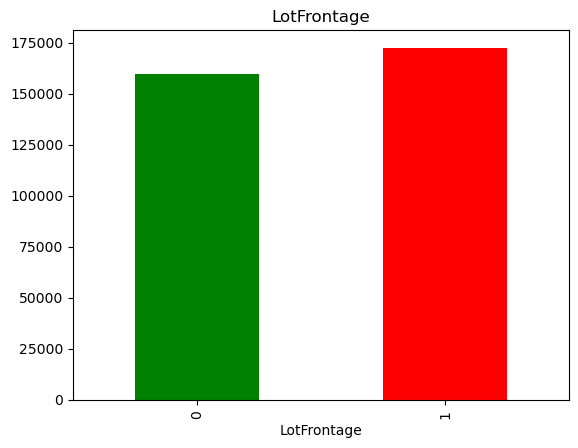

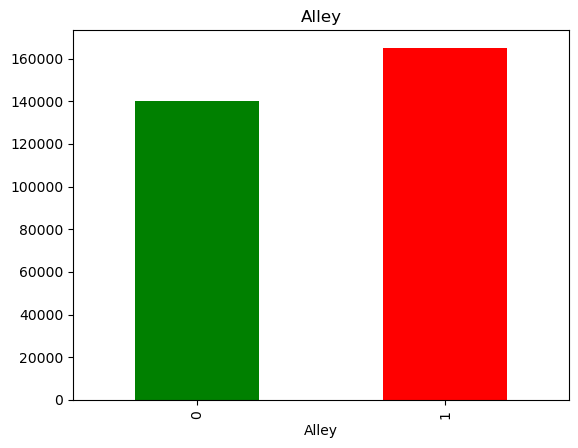

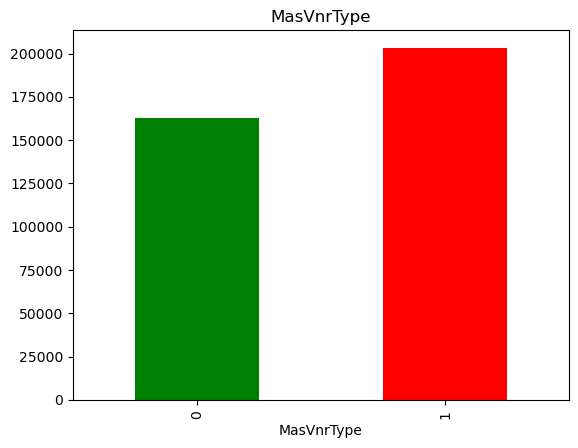

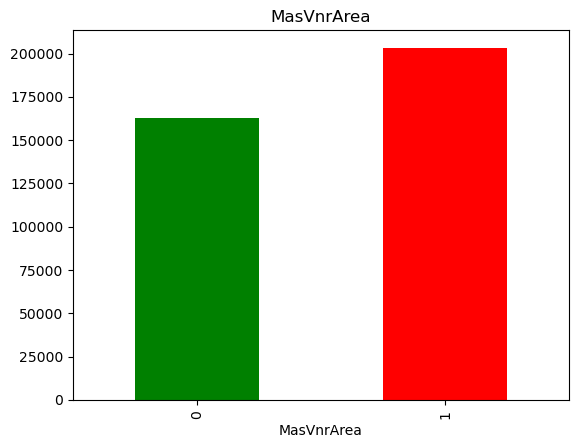

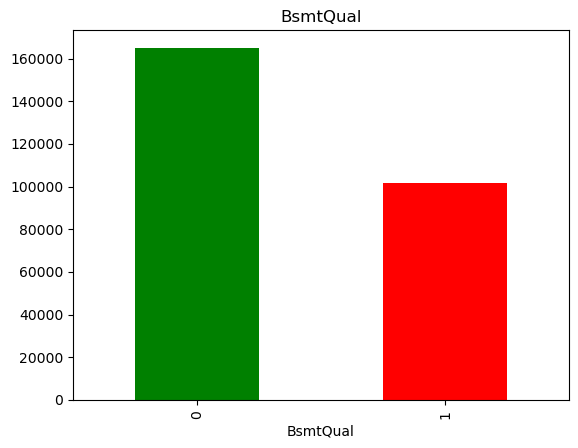

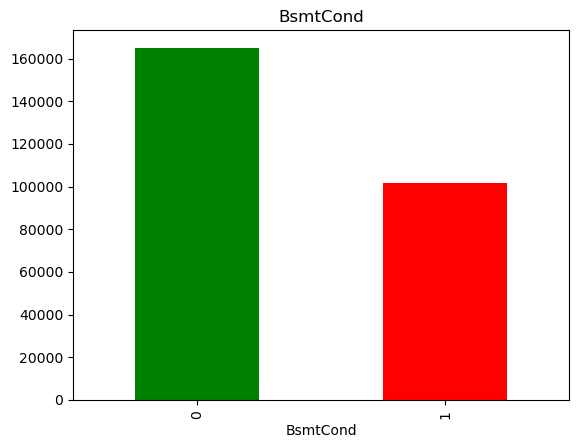

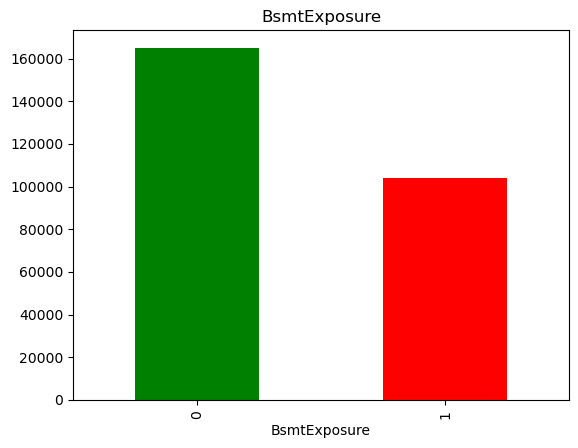

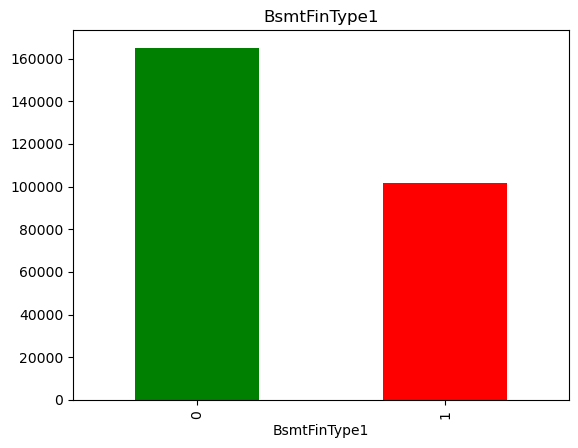

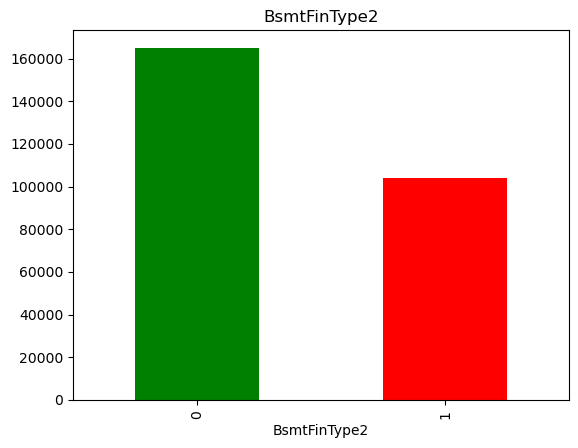

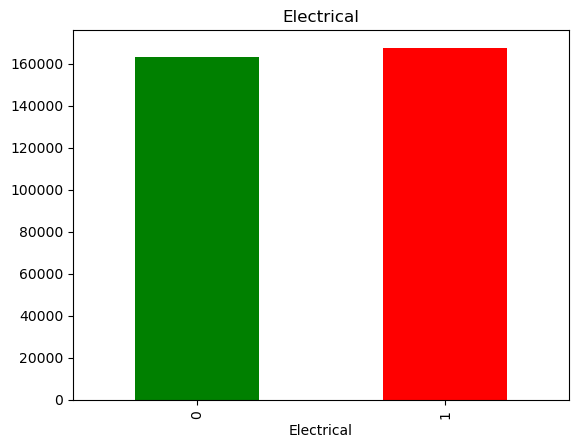

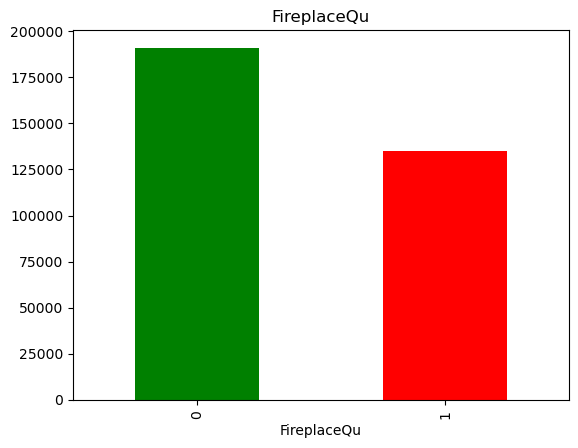

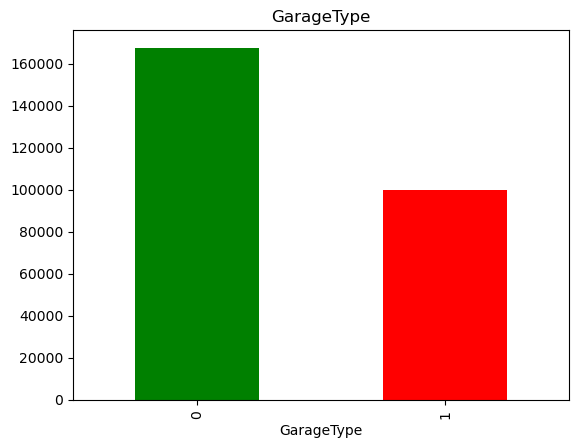

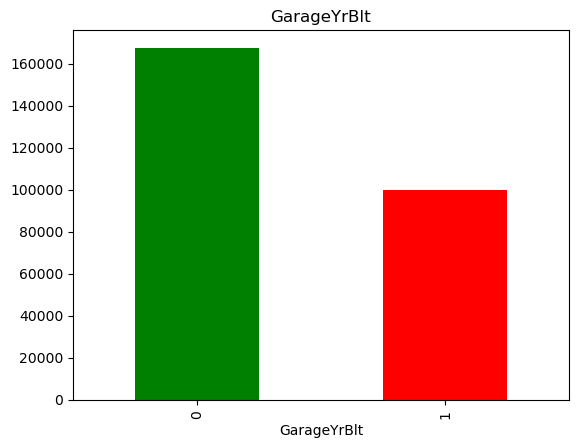

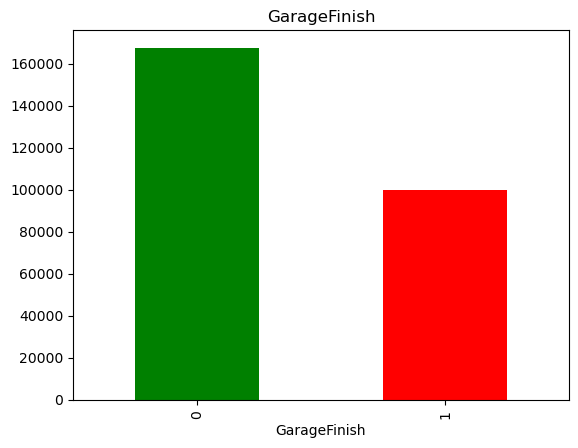

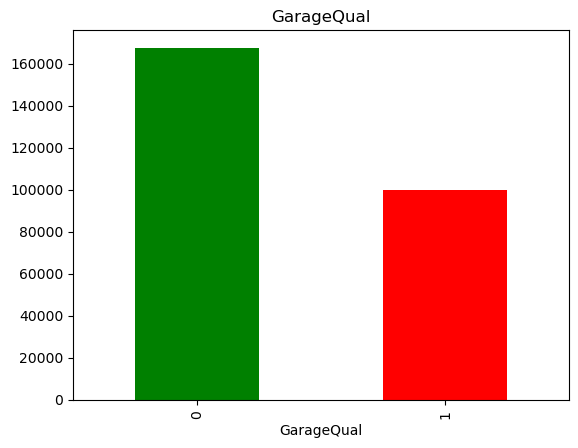

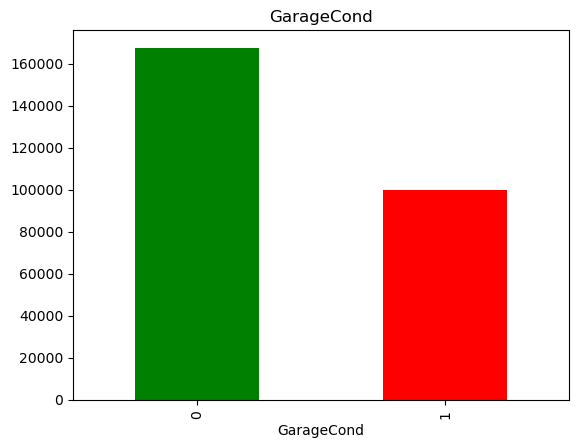

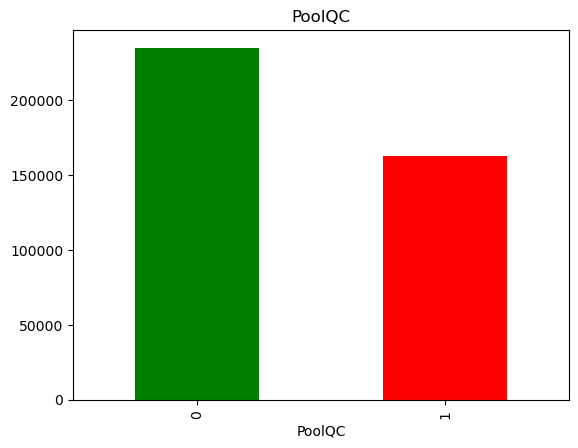

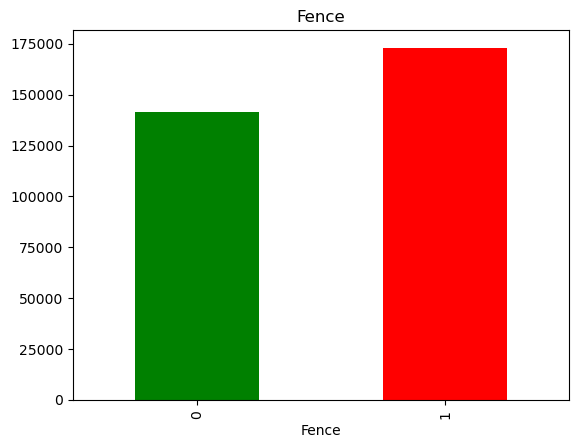

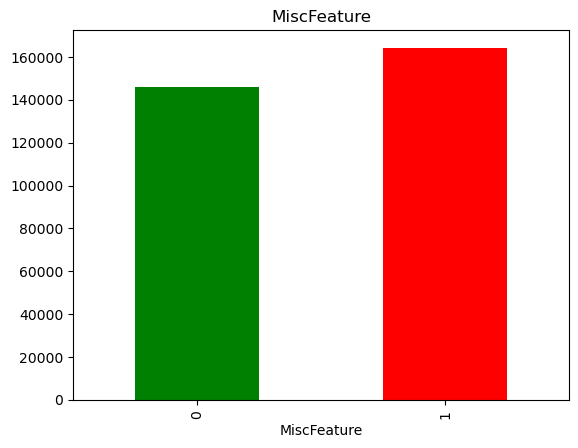

In [9]:
for feature in features_with_nan:
    #Create a copy of the original data so that it does not get affected.
    data_copy=data.copy()
    
    # make a variable which indicaes 1 if the value/observation is missing in a particular column and 0 if it is not.
    data_copy[feature]=np.where(data_copy[feature].isna(), 1, 0)
    
    #Calculate the median of the Sales Price where the information is missing or present
    # We perform the groupby function if we have discrete values or catgorical variables. Not for continuous variable
    data_copy.groupby(feature)['SalePrice'].median().plot(kind='bar', color=['green','red'])
    plt.title(feature)
    plt.show()

Here, for LotFrontage, Alley, MasVnrType, MasVnrArea, Electrical, and Fence, wherever there is Nan value, that has a higher median sales price. So the missing values is playing a major role in this. The relationship is clearly visible. We need to replace the nan values with something meaningful that would be performed in the Feature Engineering section.

Here, ***Id*** column has all unique values. So we do not need this column. We would drop it in feature engineering section.

In [10]:
len(data.Id.unique())

1460

##### Numerical values

In [11]:
feature_num=[feature for feature in data.columns if data[feature].dtypes !='O']
print('Number of numerical features: ', len(feature_num))
data[feature_num].head()

Number of numerical features:  38


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

The year field is also called as a temporal variable. It is because each and every year new data would be coming up. Current data would also be dependent on previous data in case of date-time variables.

In [12]:
# Extract out the year columns
feature_year=[feature for feature in feature_num if 'Yr' in feature or 'Year' in feature]
feature_year

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [13]:
#Content of the year variables
for feature in feature_year:
    print(feature, data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

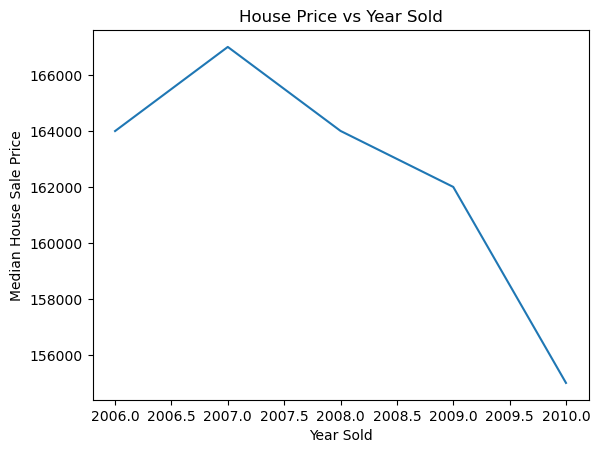

In [14]:
#Analyse the temporal date-time variables
# Lets check if there is any relationship between the year a house is sold and the sales price.
data.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Sale Price')
plt.title('House Price vs Year Sold')
plt.show()

We see that after 2007, the selling price of houses is decreasing. This is interesting as usually, the prices increase over the years. So we would investigate further.

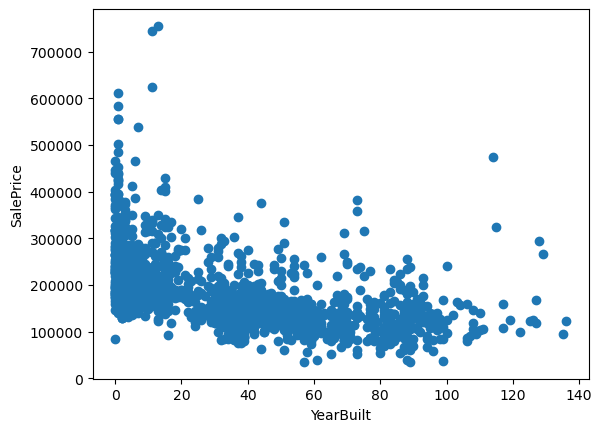

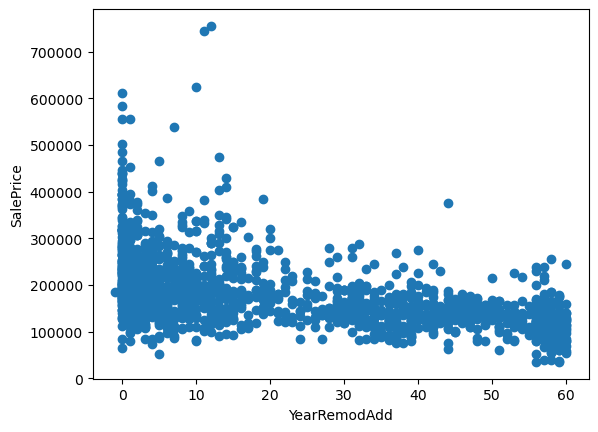

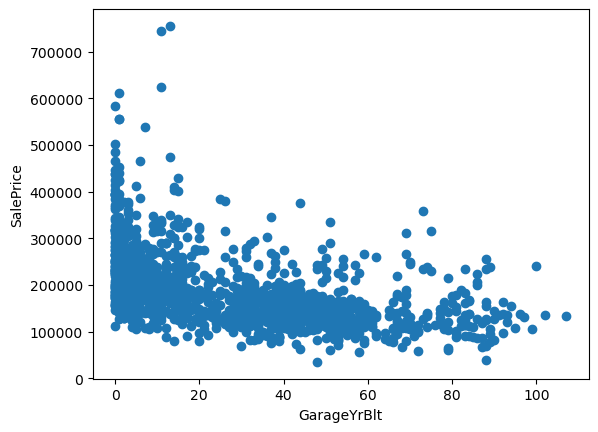

In [15]:
# Comparing difference between all the year features with SalePrice. We want to see how the SalePrice gets affected by the difference to the year built or renivated to the year sold.
for feature in feature_year:
    if feature!='YrSold':
        dataset=data.copy()
        dataset[feature]=dataset['YrSold']-dataset[feature]
        
        plt.scatter(dataset[feature], dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()


We see that the houses which were recently built or recently modified has a greater sales price as compared to the houses which were old. Eg: If house is 140 years old, the salePrice is very less. On the oother hand, the new house ahs a huge value at the time of selling. Time of remodification also affects the SalesPrice.

In [16]:
#Finding the discrete variables.
# To find the discrete variables, we have to set value for the number of unique values a particular feature has.
feature_discrete=[feature for feature in feature_num if len(data[feature].unique())<25 and feature not in feature_year+['Id']]
print('Discrete variable count:', len(feature_discrete))

Discrete variable count: 17


In [17]:
feature_discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [18]:
data[feature_discrete].head()

MSSubClass  OverallQual  OverallCond  LowQualFinSF  BsmtFullBath  \
0          60            7            5             0             1   
1          20            6            8             0             0   
2          60            7            5             0             1   
3          70            7            5             0             1   
4          60            8            5             0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  \
0             0         2         1             3             1             8   
1             1         2         0             3             1             6   
2             0         2         1             3             1             6   
3             0         1         0             3             1             7   
4             0         2         1             4             1             9   

   Fireplaces  GarageCars  3SsnPorch  PoolArea  MiscVal  MoSold  
0           0           2          0         0        0       2  
1           1           2          0         0        0       5  
2           1           2          0         0        0       9  
3           1           3          0         0        0       2  
4           1           3          0         0        0      12

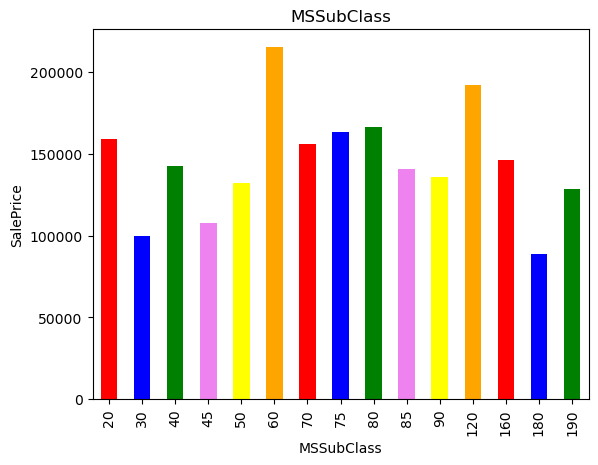

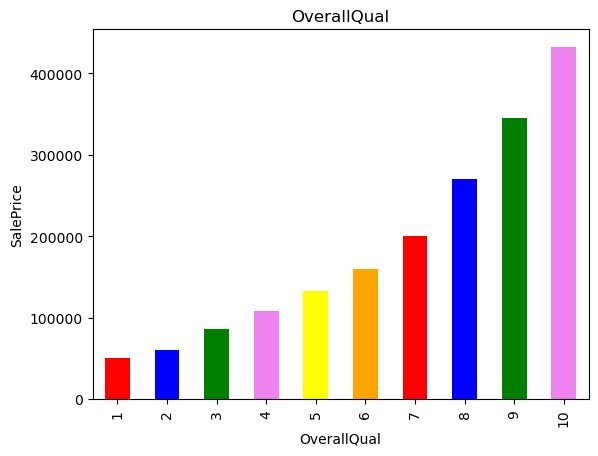

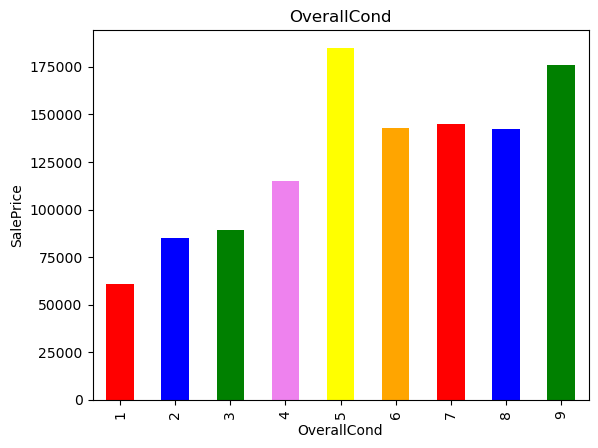

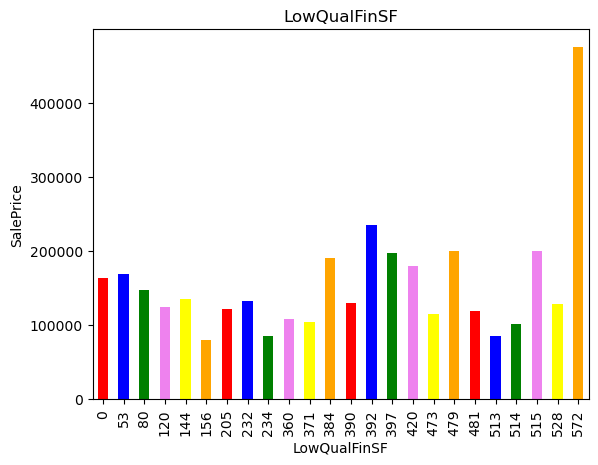

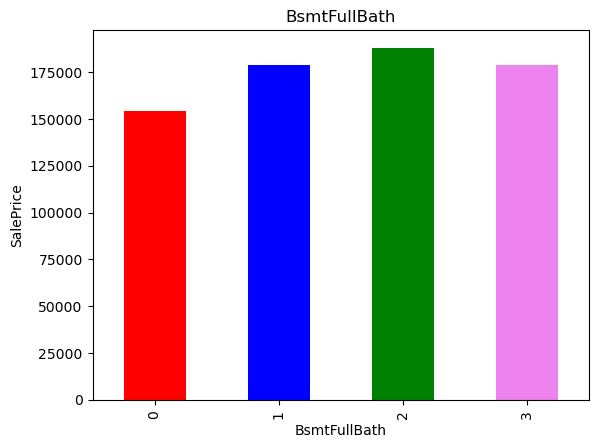

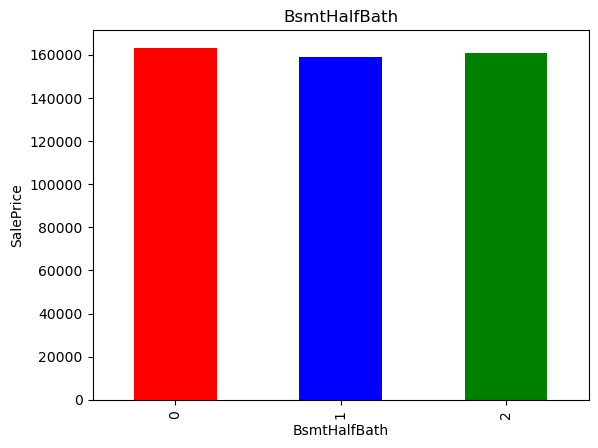

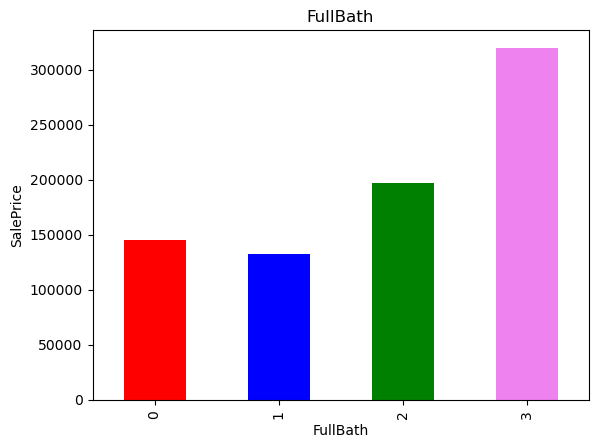

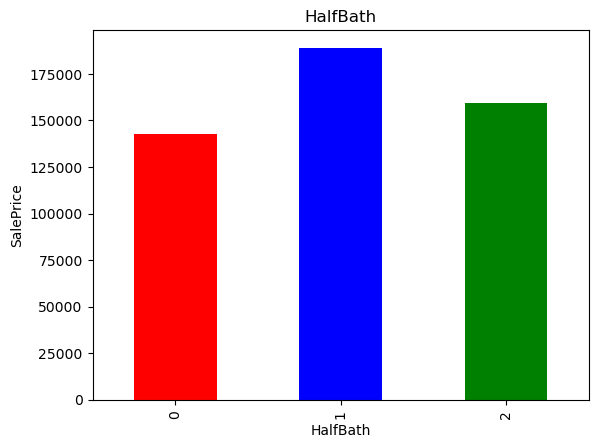

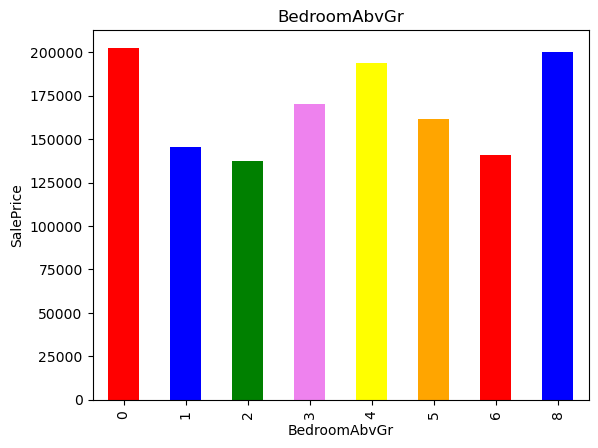

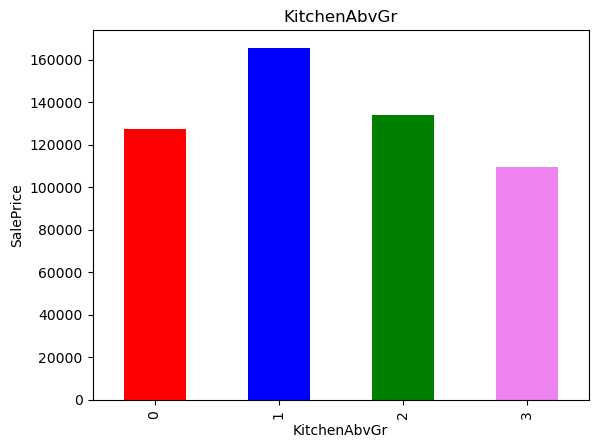

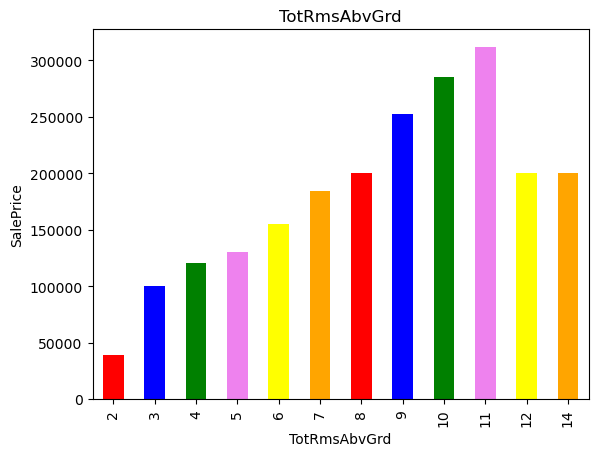

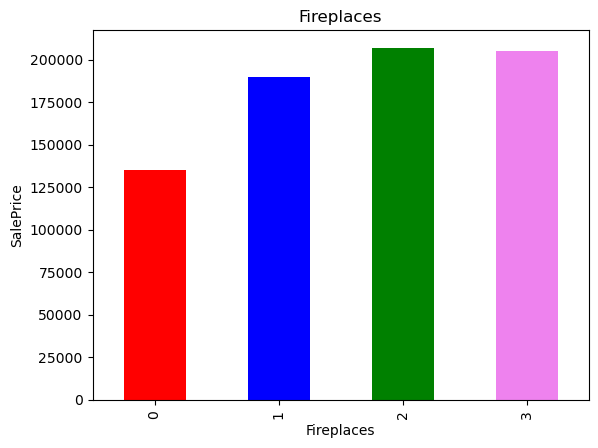

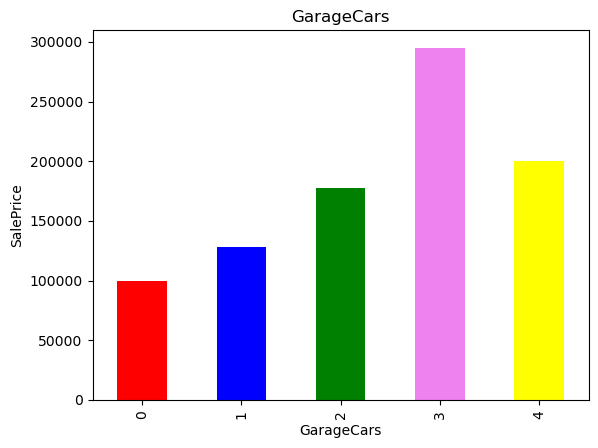

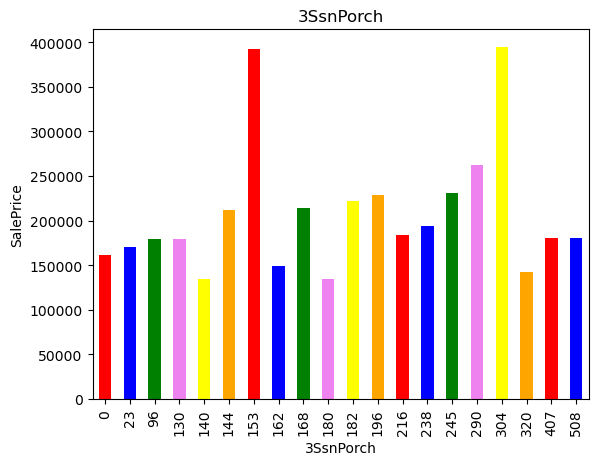

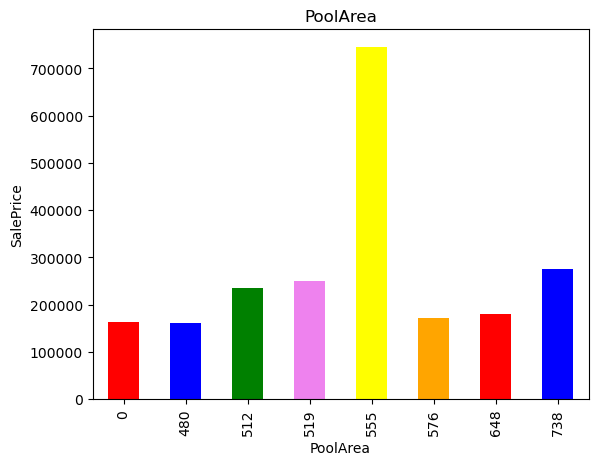

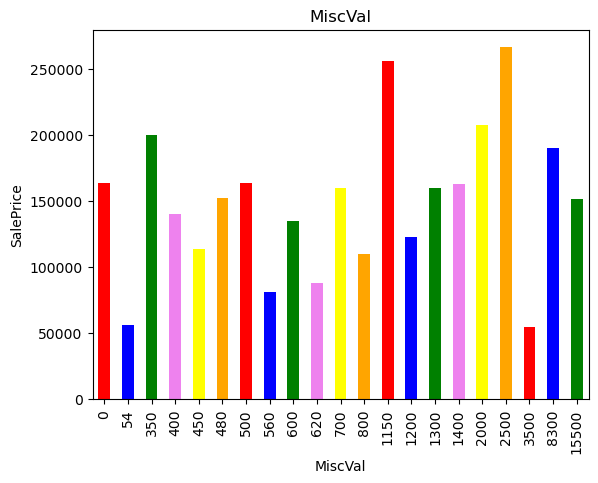

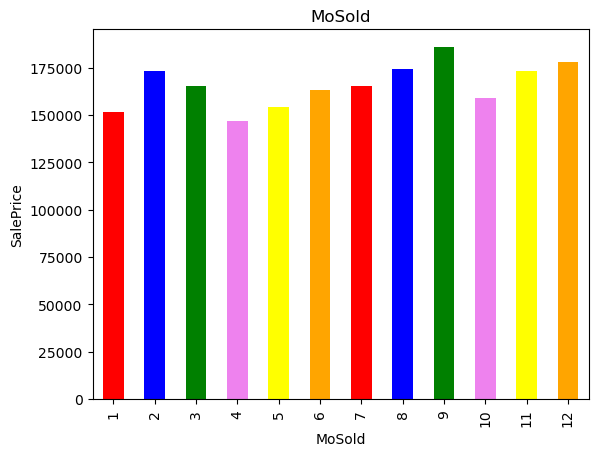

In [19]:
#Find the relationship between Discrete variables and the sales price
for feature in feature_discrete:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot(kind='bar', color=['red','blue','green','violet','yellow','orange'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observation: We need to find relationships betweem the discrete variable and the SalePrice
1. There is an exponential increase in Sale prrice with increase in Overall Quality of the house. Monotonic relationship.
2. The Sale price also increases with the overall condition
3. The sale price also increases with FullBath. Kind of monotonic relationship.
4. The Sale Price increases monotonically for upto 10 TotRmsAbvGrd, but after that it decreases and is constant.
5. The price also increases with number of fireplaces.
6. The Number of Garage cars also leads to increase in Sale Price monotonically upto 3 Garagecars and then it decreases for 4.
7. Houses with 555 pool area is sold with exceptional high Sale price compared to other pool areas.

In [20]:
#Continuous features
feature_continuous=[feature for feature in feature_num if feature not in feature_discrete + feature_year + ['Id']]
print('Number of continuous features', len(feature_continuous))

Number of continuous features 16


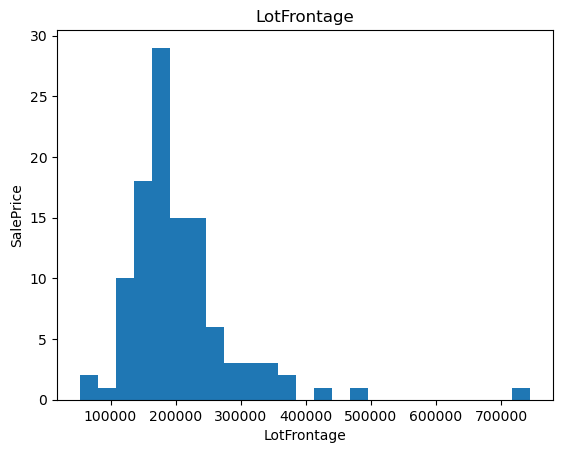

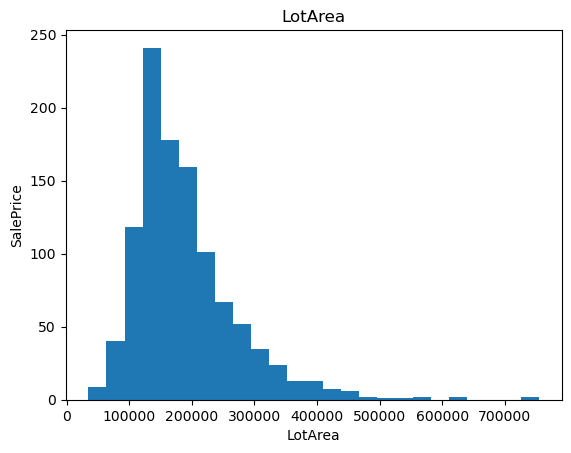

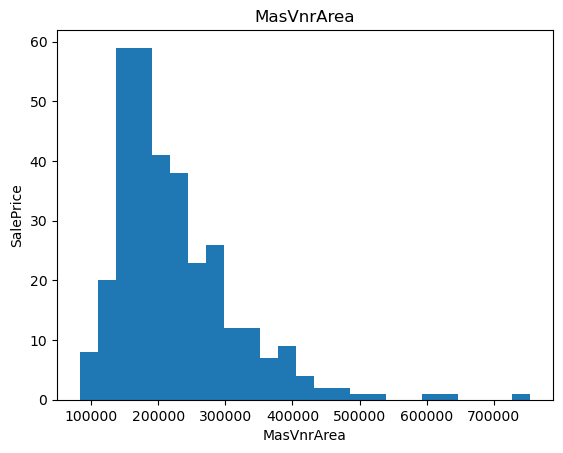

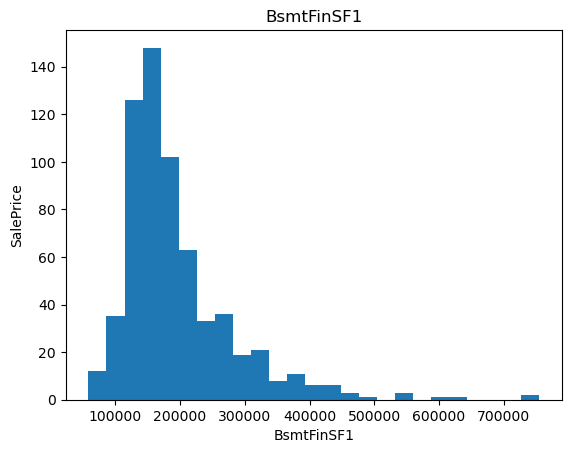

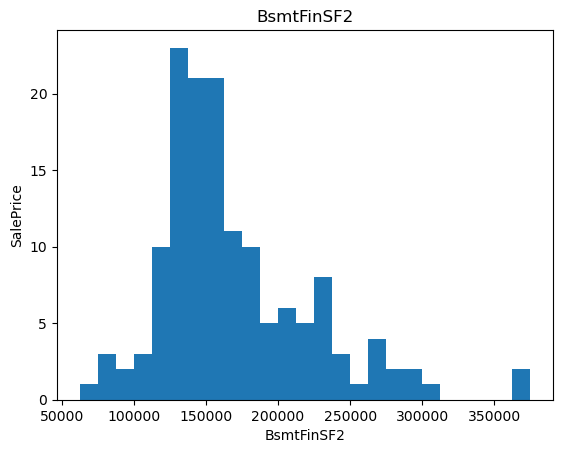

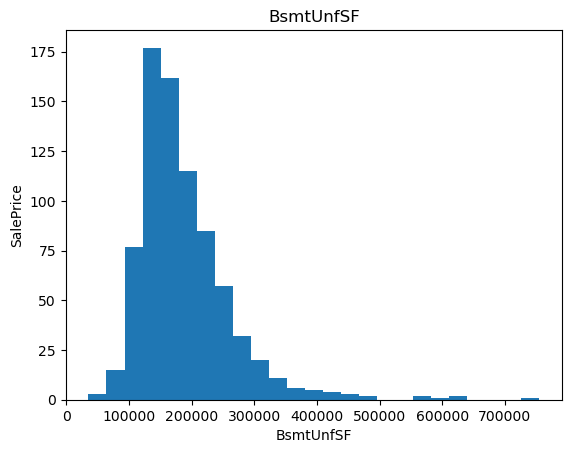

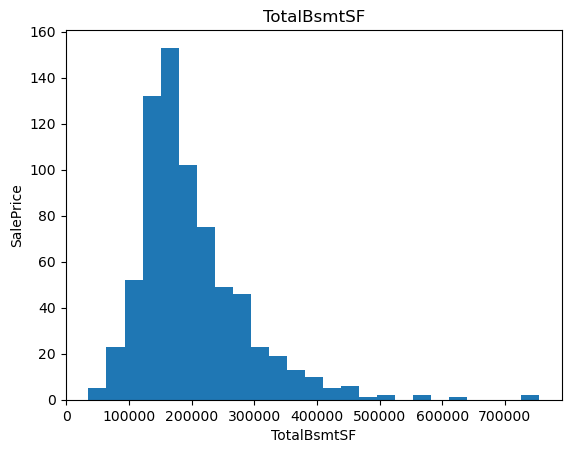

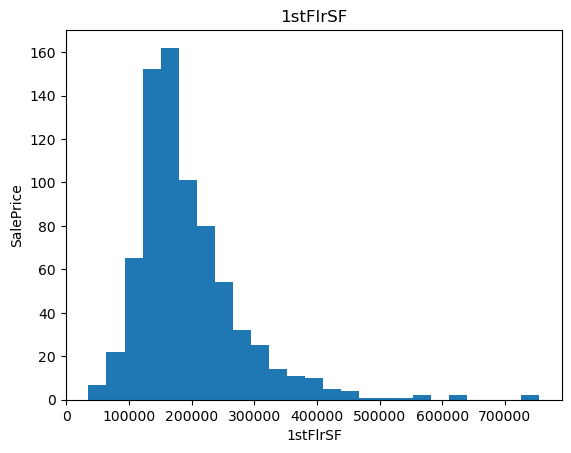

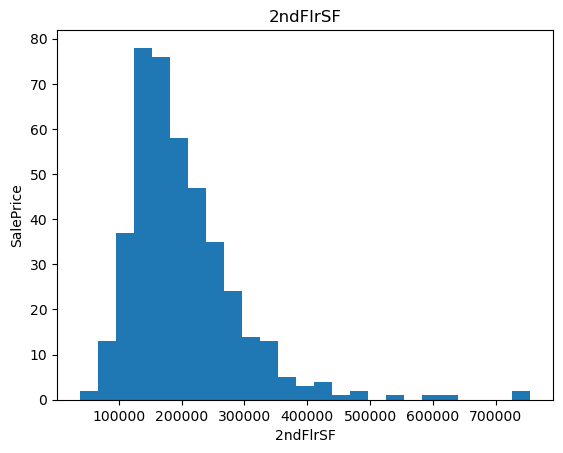

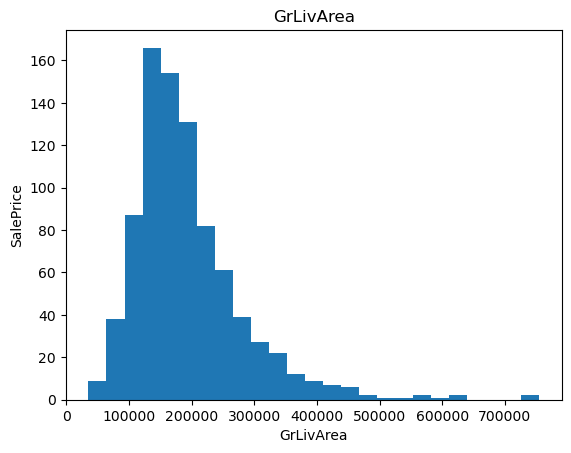

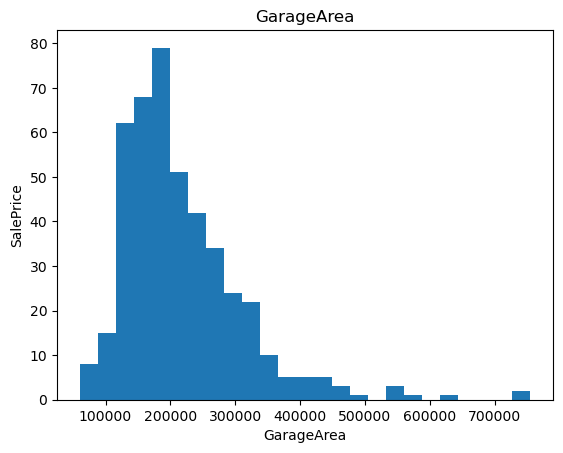

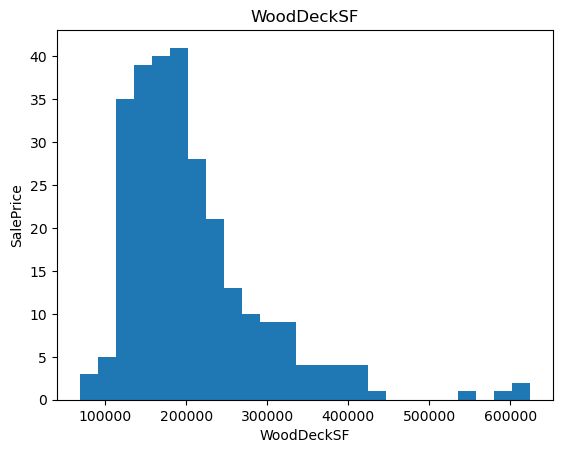

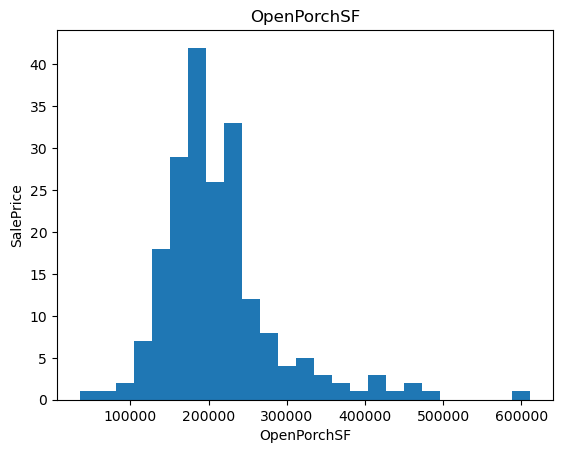

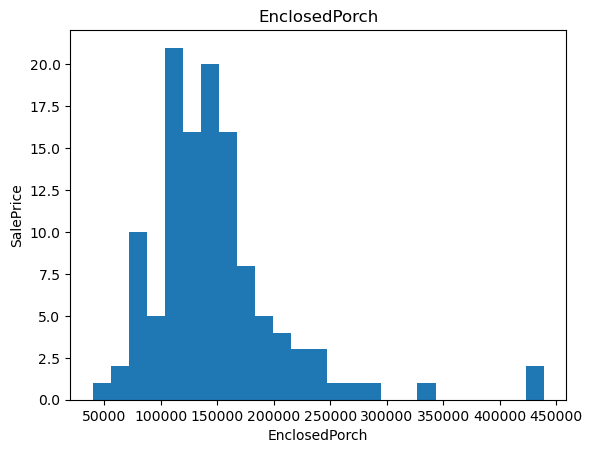

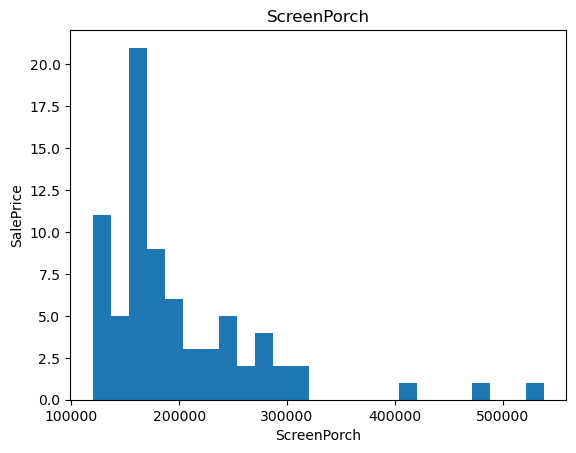

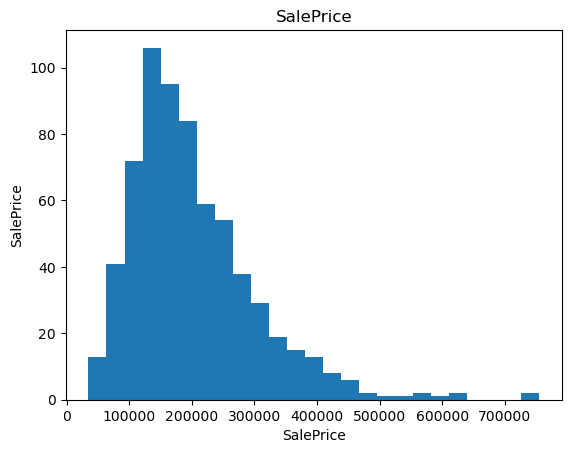

In [21]:
#For contunuous varable, we plot histogram and not bar charts to see the relationship with Sales price. Thus gives the distribution of Sales price.
for feature in feature_continuous:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot(kind='hist', bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

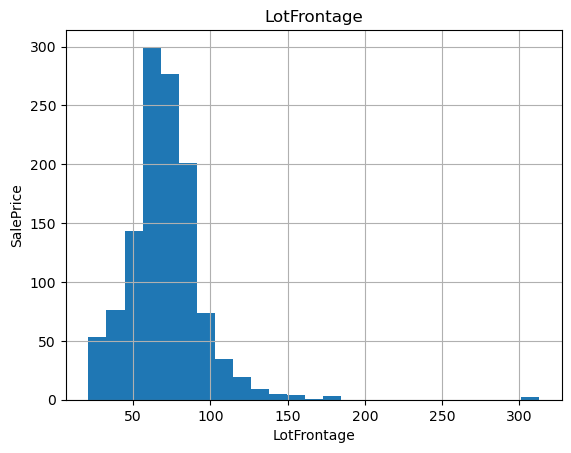

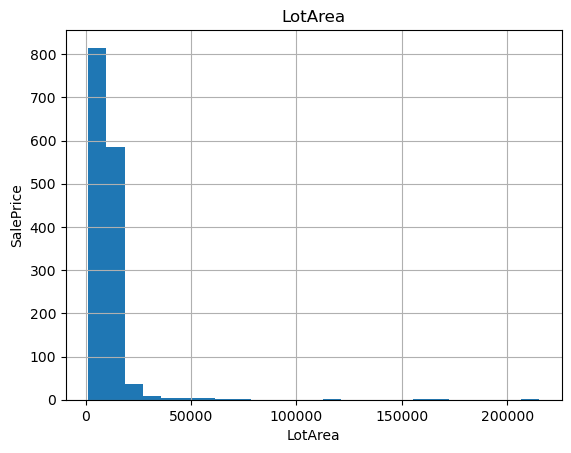

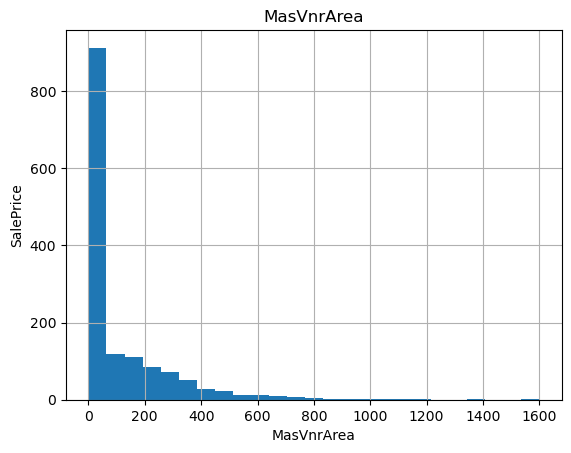

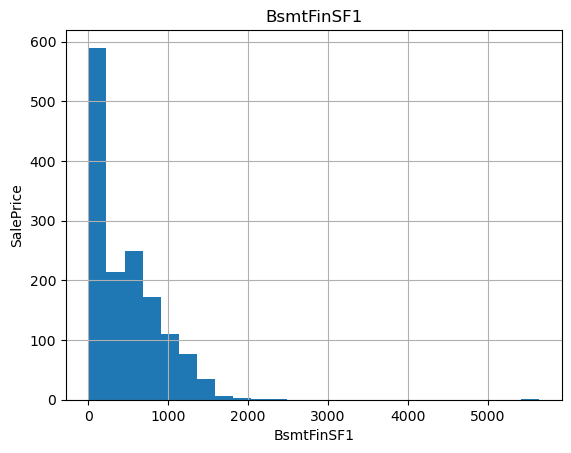

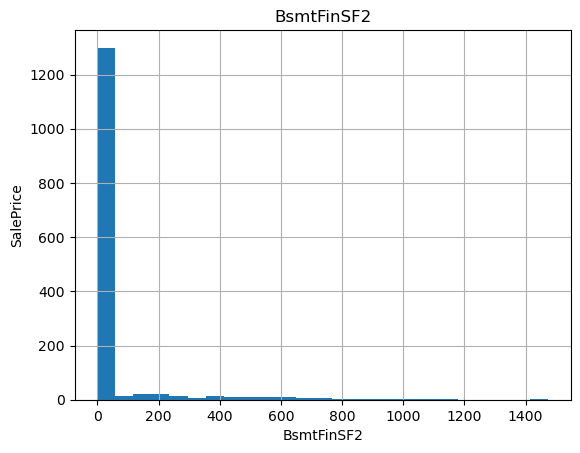

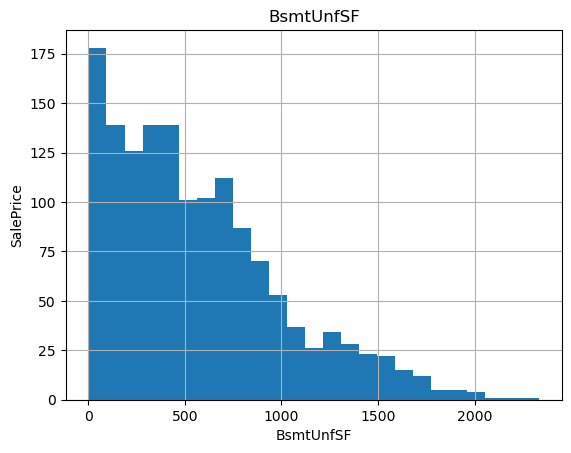

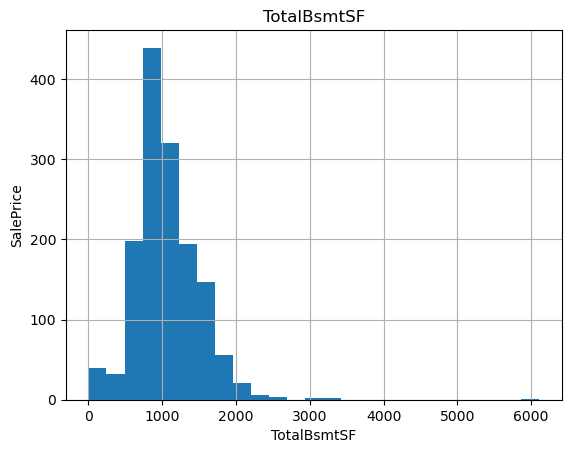

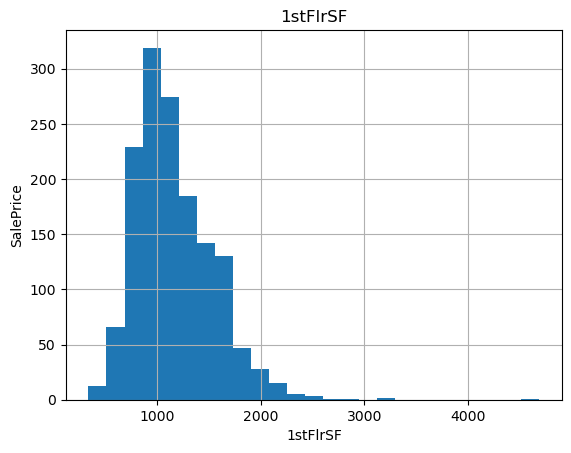

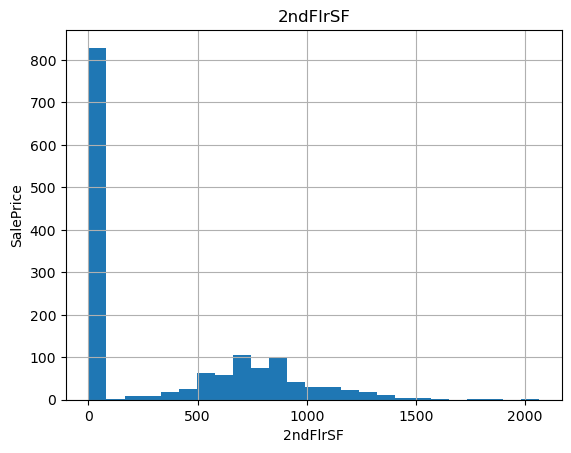

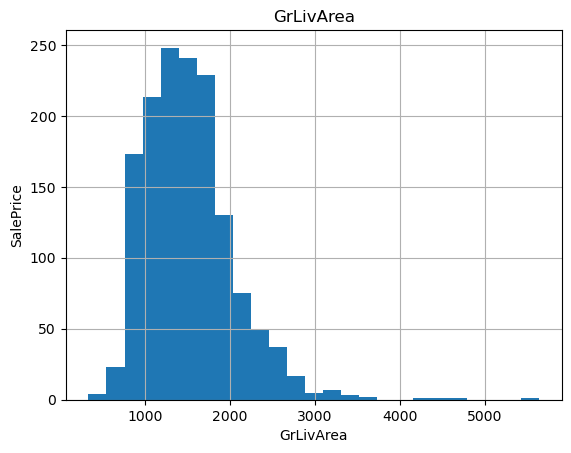

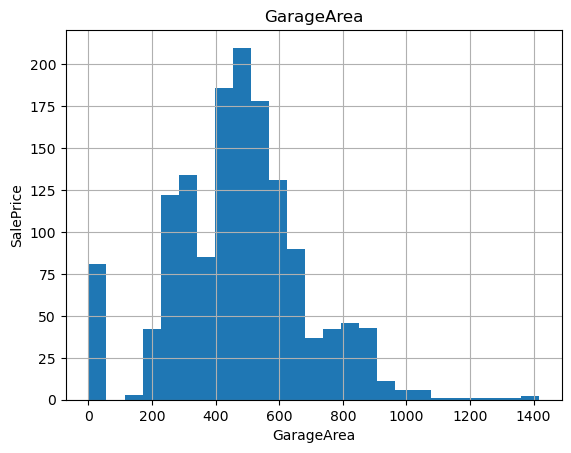

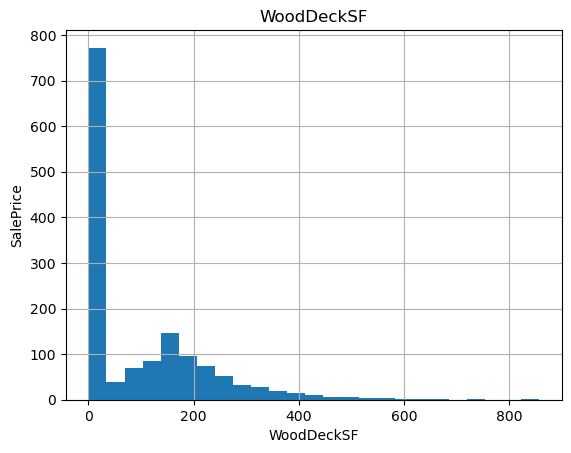

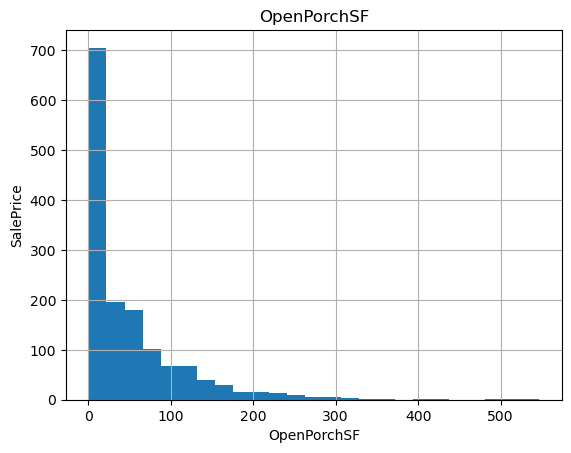

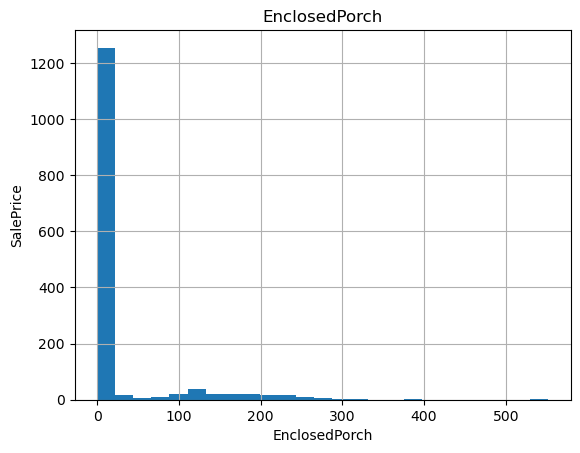

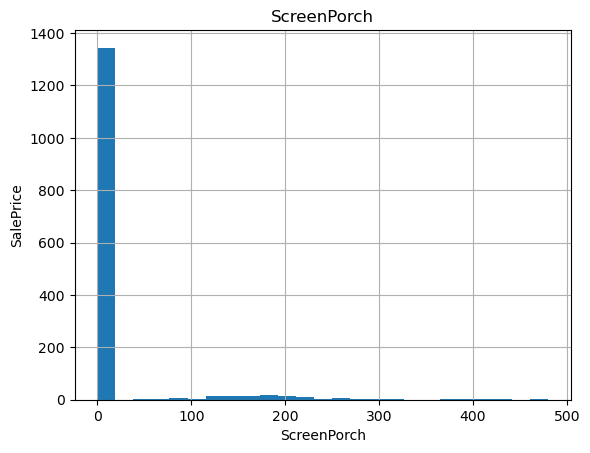

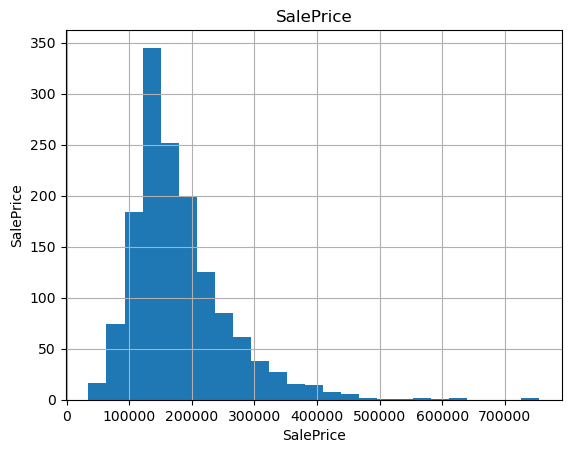

In [22]:
for feature in feature_continuous:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Observation:
1. LoTFrontage, TotalBsmtSF, 1stFlrSF, GrLivArea, GarageArea, SalePrice has kind of normal distribution. 
2. Other features are mostly right skewed.

### Whenever we are solving a regression problem statement, convert non-gaussian ditribution into a gaussian distribution or a standard normal distribution. It would be helpful for linear model prediction.

##### For data that is skewed, we usually transform it into log-normal distribution.

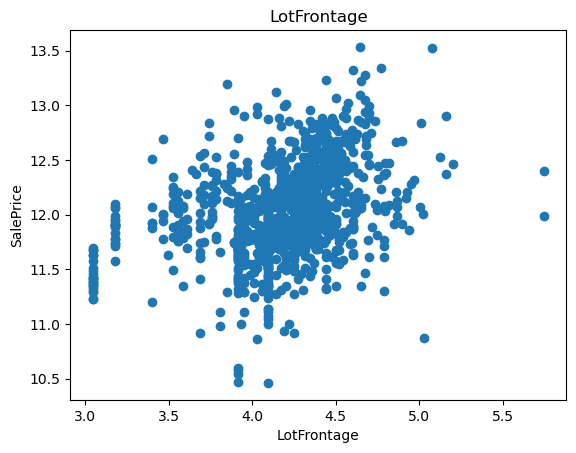

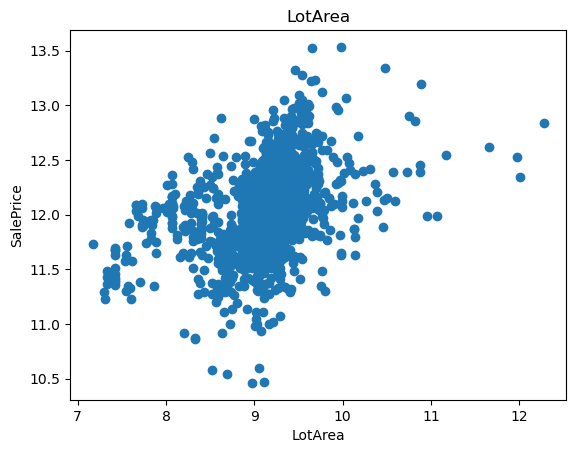

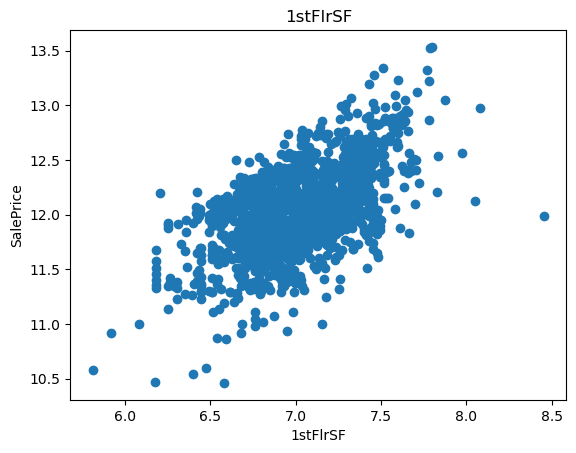

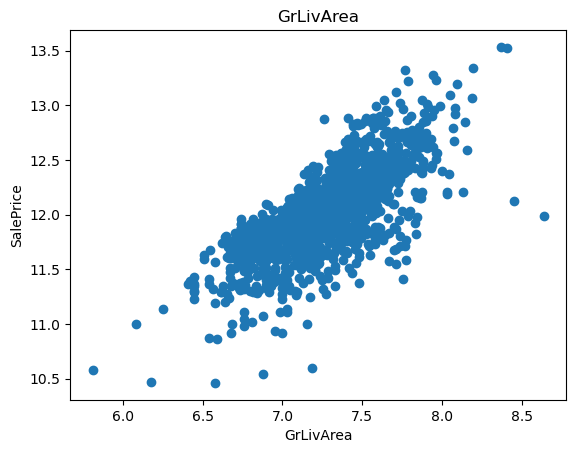

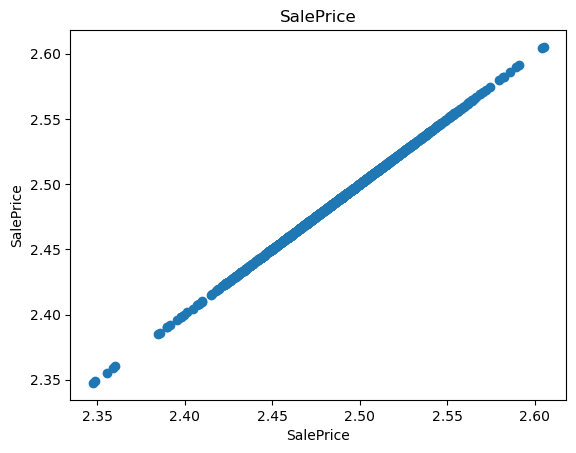

In [23]:
for feature in feature_continuous:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    #We do this above check because log(0) is not defined.
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature], dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()
        

Observation:
1. After doing log-normal transformation of continuous features and the dependent feature(SalePrice), we see that, 1stFlrSF and  GrLivArea there is a monotonous relation. It would give a positive correlation value.
2. Other two features also has a positive relationship but less prominent.

##### Outliers

To show the outliers, we use boxplot. The box-plot does not work for discrete variables. It is good only for continuous variables.

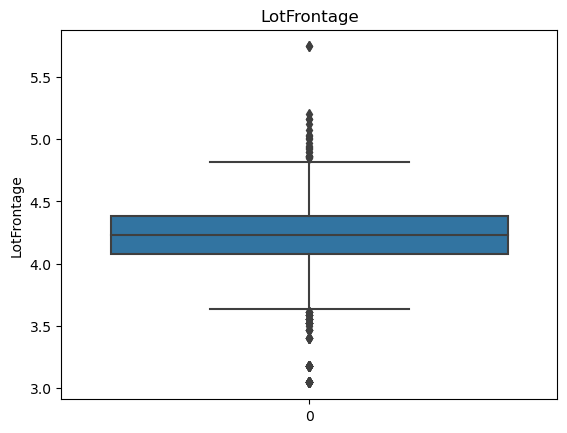

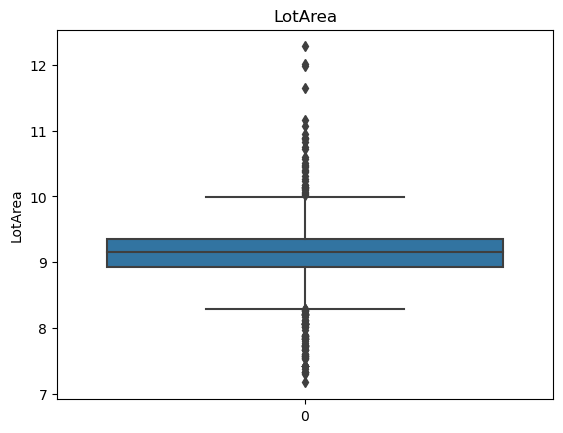

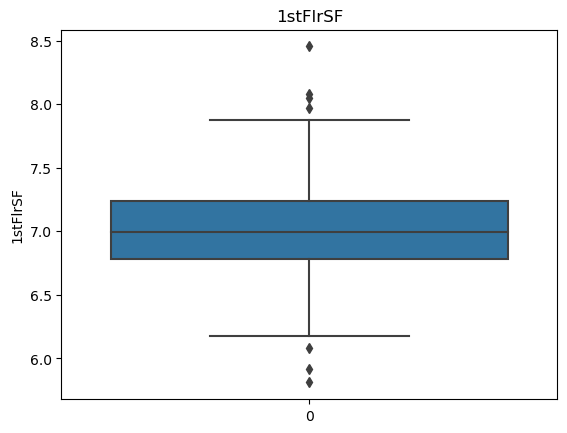

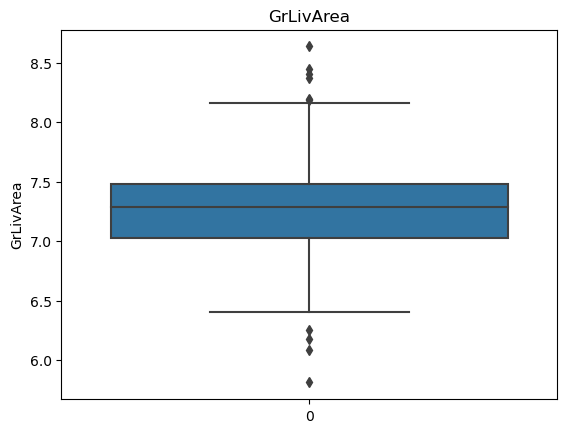

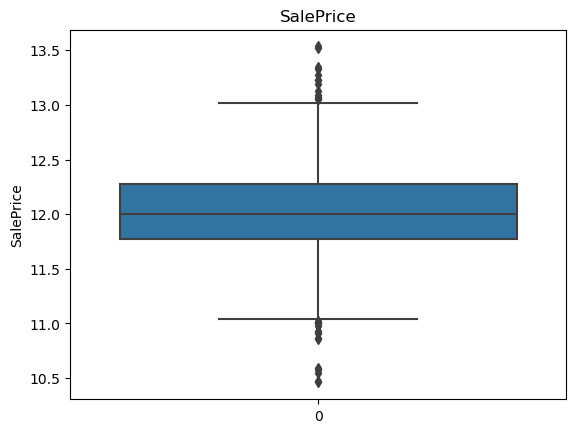

In [24]:
for feature in feature_continuous:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        sns.boxplot(data=dataset[feature])
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
    

Observation:
1. There are lot of outliers in the data
2. **That is the reason we take median of sales price and not the mean as we have lot of outliers**

##### Categorical Features

In [25]:
feature_categorical=[feature for feature in data.columns if data[feature].dtypes=='O']
print('Number of categorical features: ', len(feature_categorical))
feature_categorical

Number of categorical features:  43


['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [26]:
data[feature_categorical].head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle RoofMatl  \
0      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
1      Veenker      Feedr       Norm     1Fam     1Story     Gable  CompShg   
2      CollgCr       Norm       Norm     1Fam     2Story     Gable  CompShg   
3      Crawfor       Norm       Norm     1Fam     2Story     Gable  CompShg   
4      NoRidge       Norm       Norm     1Fam     2Story     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation BsmtQual  \
0     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
1     MetalSd     MetalSd       None        TA        TA     CBlock       Gd   
2     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   
3     Wd Sdng     Wd Shng       None        TA        TA     BrkTil       TA   
4     VinylSd     VinylSd    BrkFace        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA           No          GLQ          Unf    GasA        Ex   
1       TA           Gd          ALQ          Unf    GasA        Ex   
2       TA           Mn          GLQ          Unf    GasA        Ex   
3       Gd           No          ALQ          Unf    GasA        Gd   
4       TA           Av          GLQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          Gd        Typ         NaN     Attchd   
1          Y      SBrkr          TA        Typ          TA     Attchd   
2          Y      SBrkr          Gd        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Detchd   
4          Y      SBrkr          Gd        Typ          TA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0          RFn         TA         TA          Y    NaN   NaN         NaN   
1          RFn         TA         TA          Y    NaN   NaN         NaN   
2          RFn         TA         TA          Y    NaN   NaN         NaN   
3          Unf         TA         TA          Y    NaN   NaN         NaN   
4          RFn         TA         TA          Y    NaN   NaN         NaN   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD       Abnorml  
4       WD        Normal

**First thing to focus in case of categorical variables is the cardinality value. How many different categories are there in the categorical feature**

In [27]:
#How many unique categories are present in categorical features
for feature in feature_categorical:
    dataset=data.copy()
    print('Number of unique categories in', feature, dataset[feature].nunique())
    #Also can use print('Feature is {} and the number of categories are {}'.format(feature, dataset[feature].nunique()))

Number of unique categories in MSZoning 5
Number of unique categories in Street 2
Number of unique categories in Alley 2
Number of unique categories in LotShape 4
Number of unique categories in LandContour 4
Number of unique categories in Utilities 2
Number of unique categories in LotConfig 5
Number of unique categories in LandSlope 3
Number of unique categories in Neighborhood 25
Number of unique categories in Condition1 9
Number of unique categories in Condition2 8
Number of unique categories in BldgType 5
Number of unique categories in HouseStyle 8
Number of unique categories in RoofStyle 6
Number of unique categories in RoofMatl 8
Number of unique categories in Exterior1st 15
Number of unique categories in Exterior2nd 16
Number of unique categories in MasVnrType 4
Number of unique categories in ExterQual 4
Number of unique categories in ExterCond 5
Number of unique categories in Foundation 6
Number of unique categories in BsmtQual 4
Number of unique categories in BsmtCond 4
Number 

Observation:
1. Neighborhood, Exterior1st, Exterior2nd has large number of categories.
2. Remaining categorical features can be handled with **one-hot encoding**.
3. Also SaleType has 9 categories. We can use some other technique. 

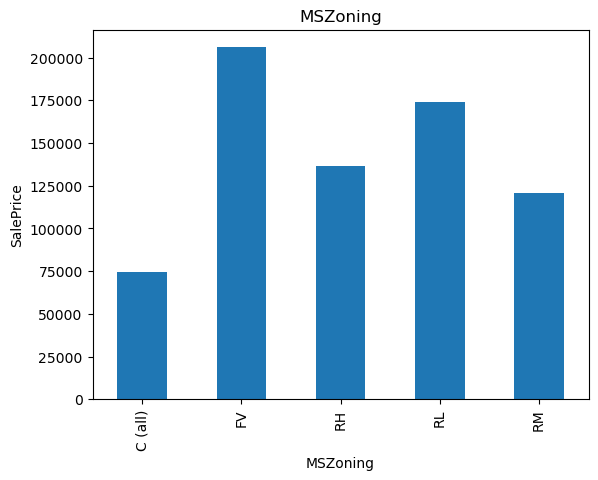

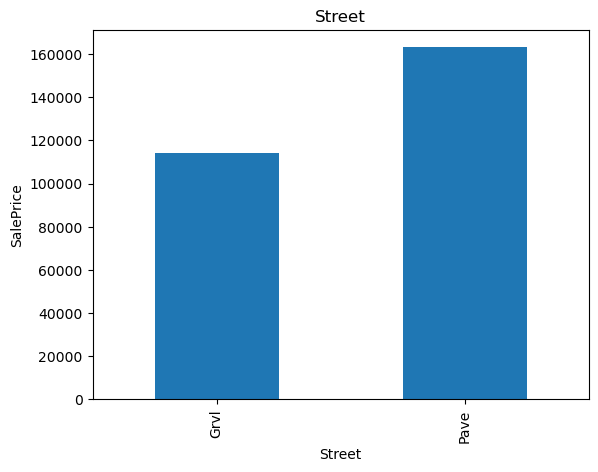

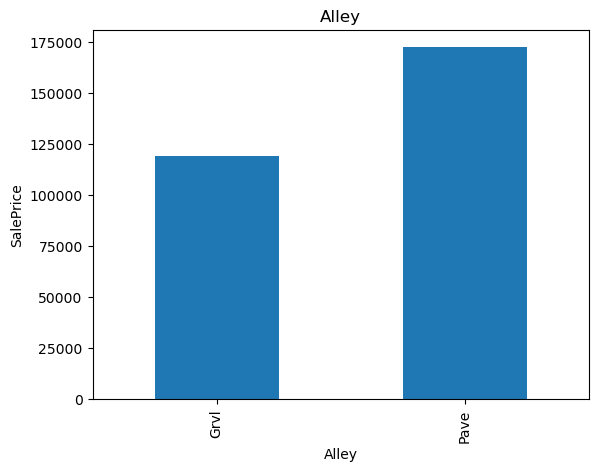

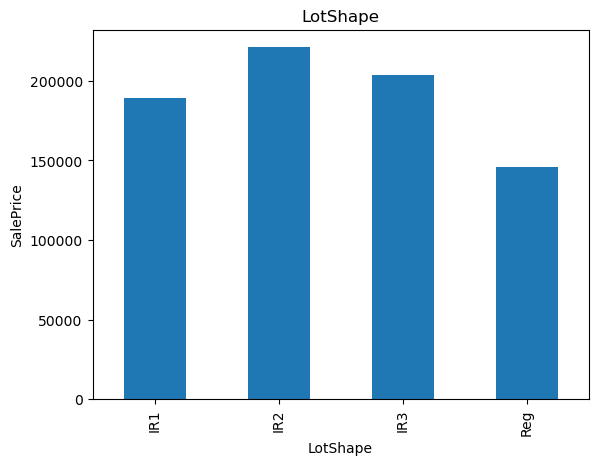

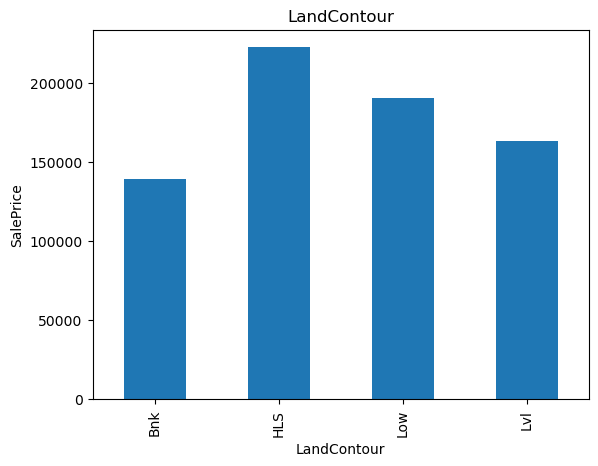

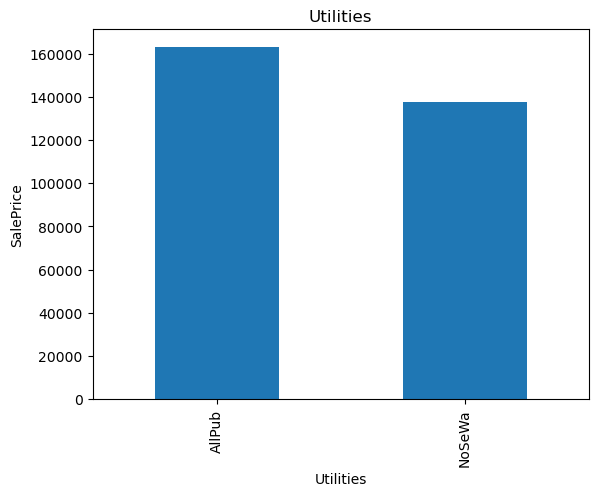

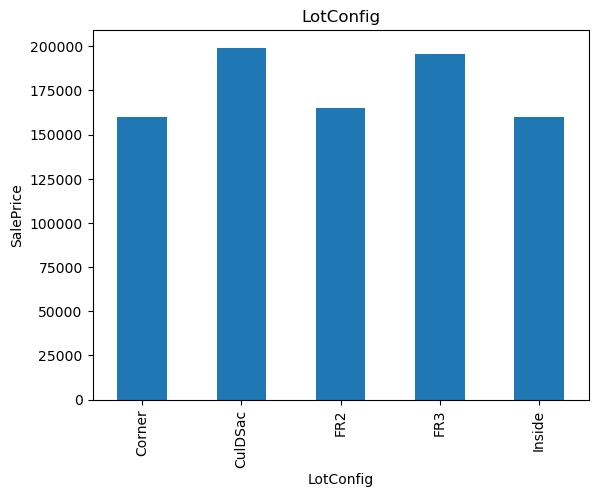

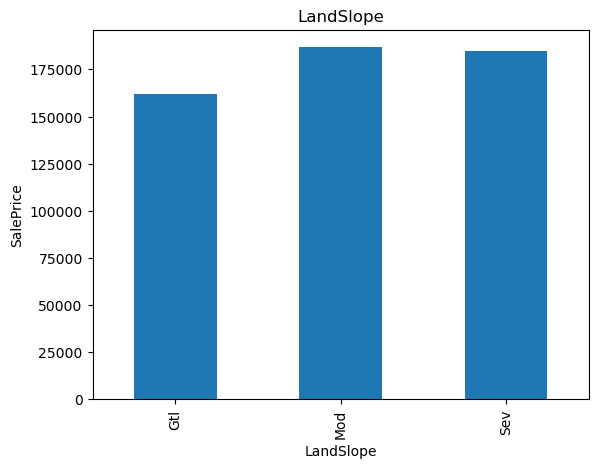

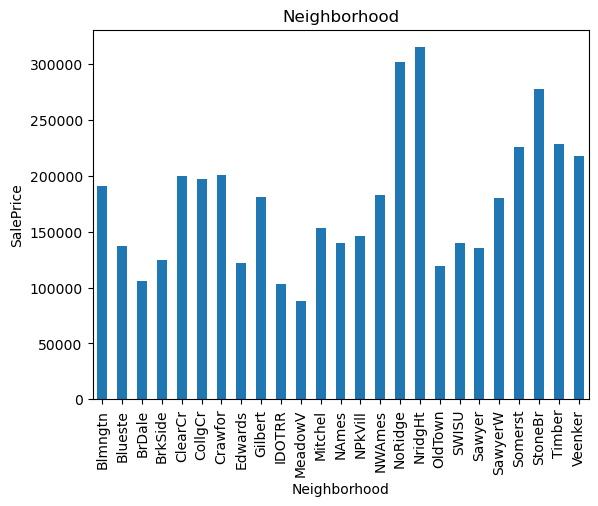

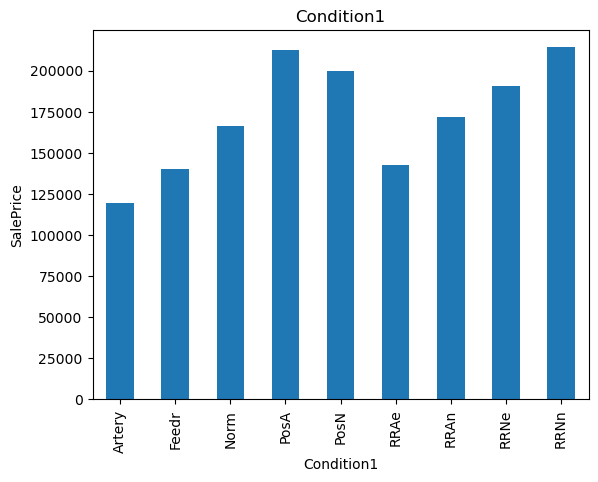

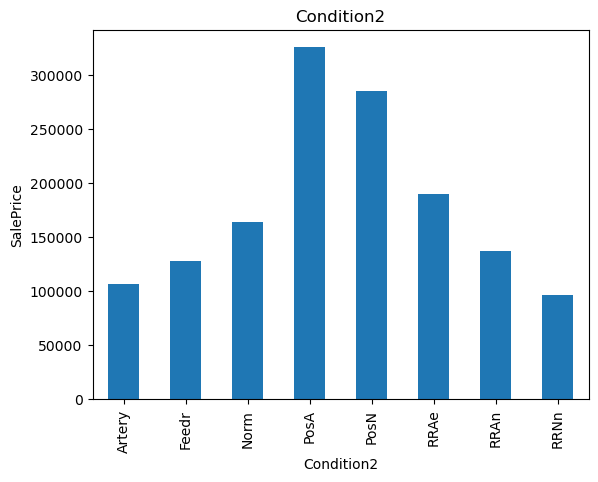

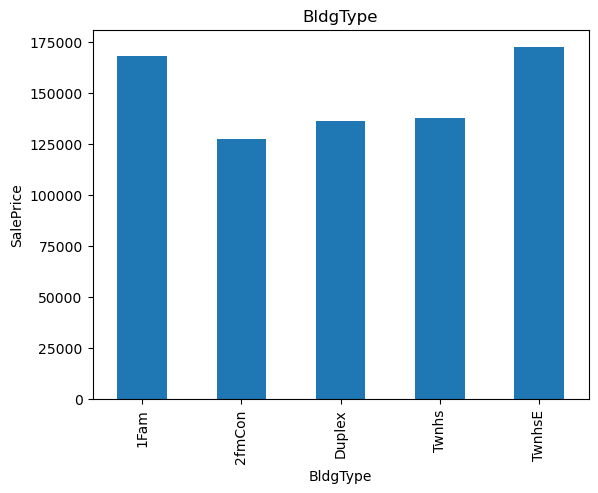

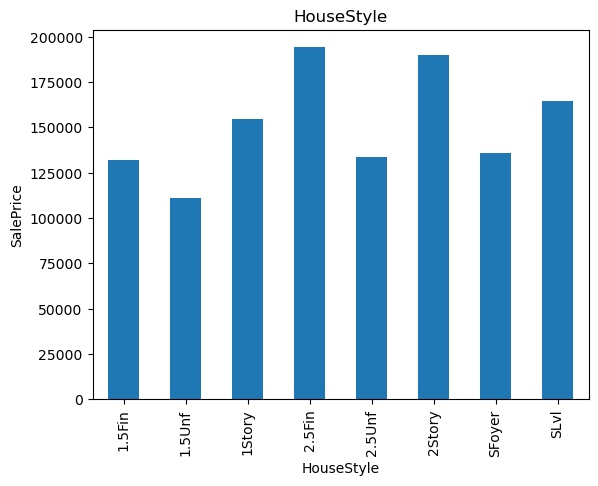

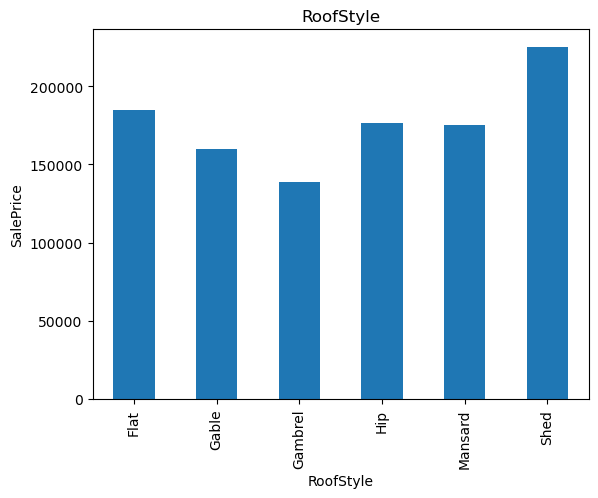

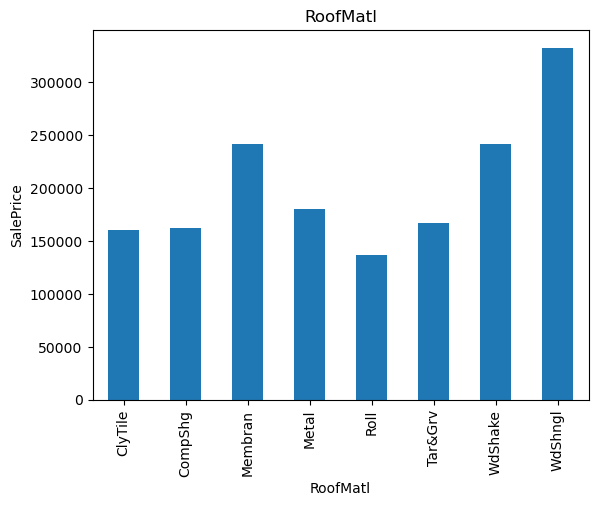

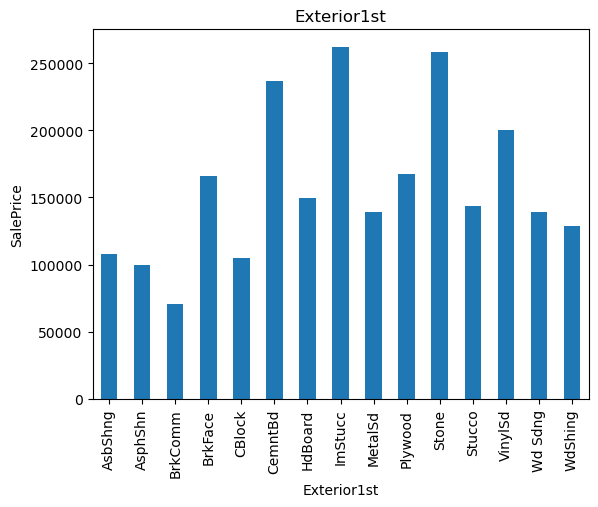

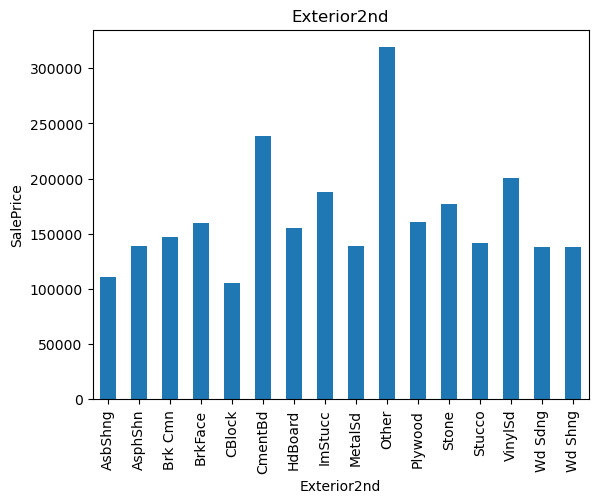

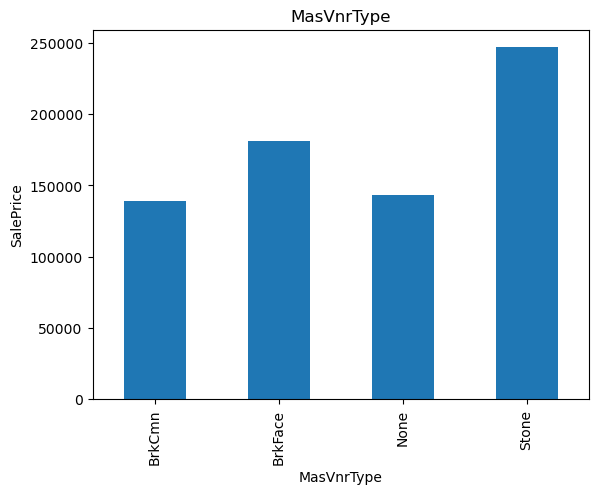

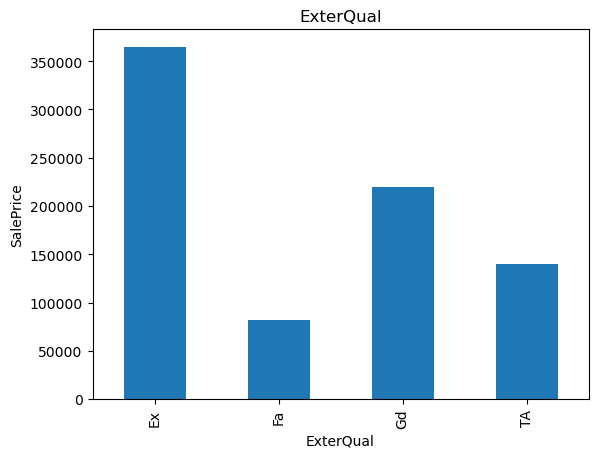

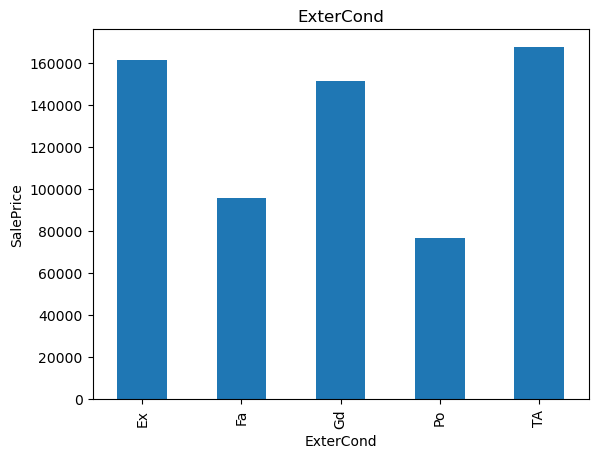

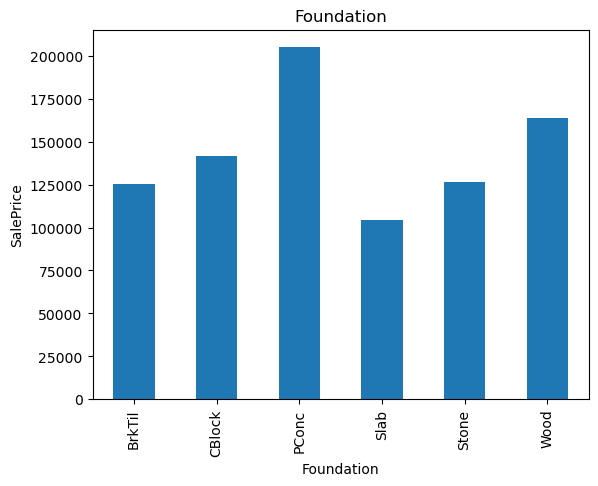

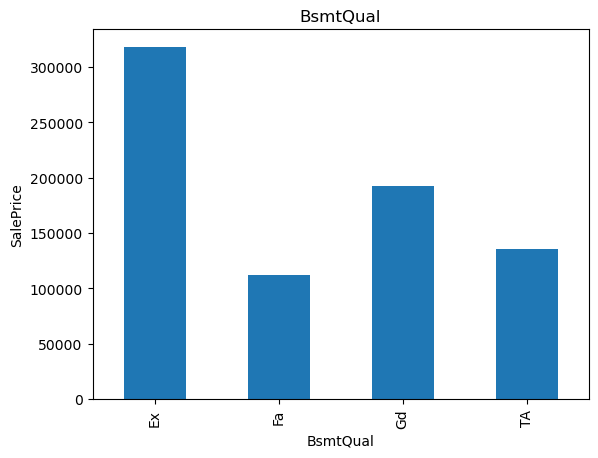

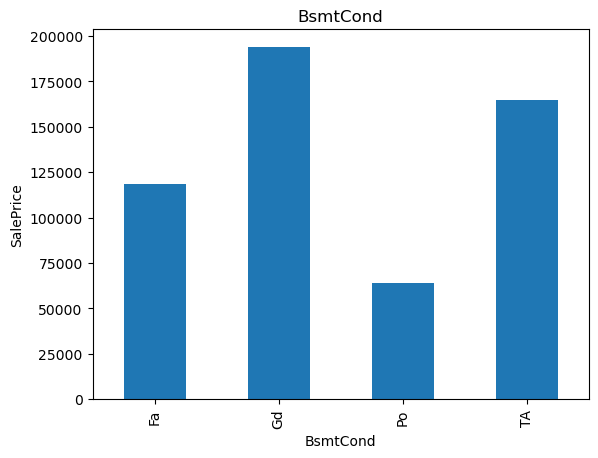

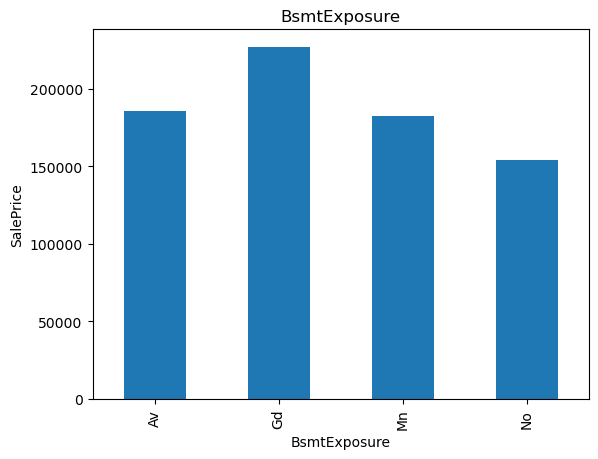

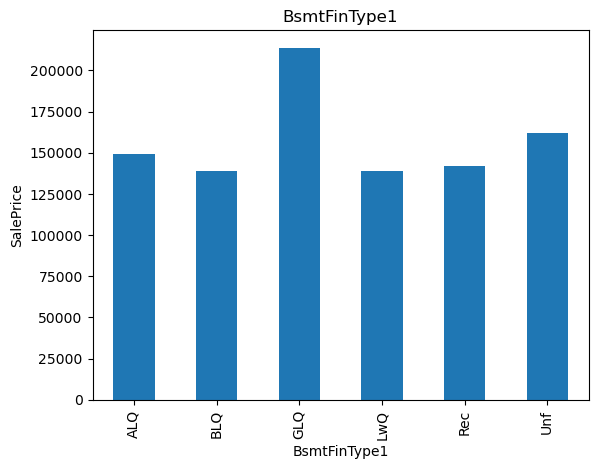

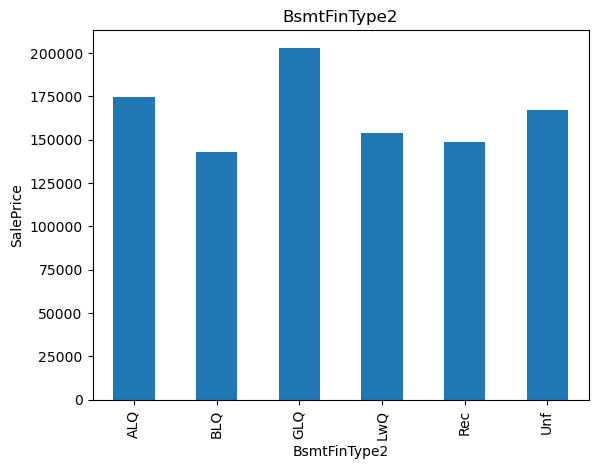

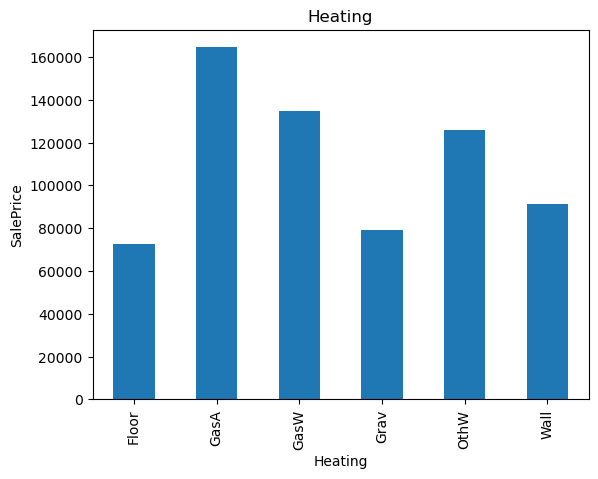

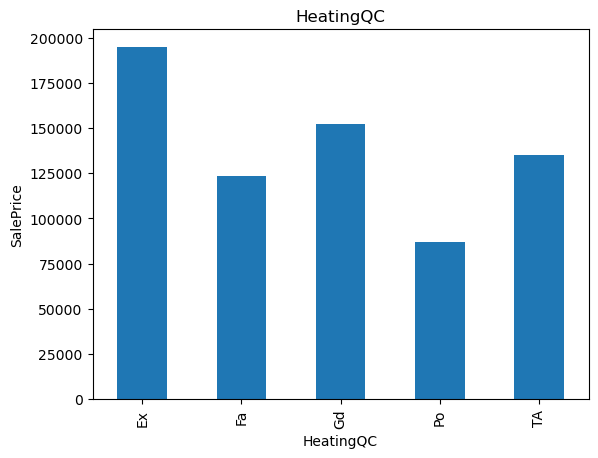

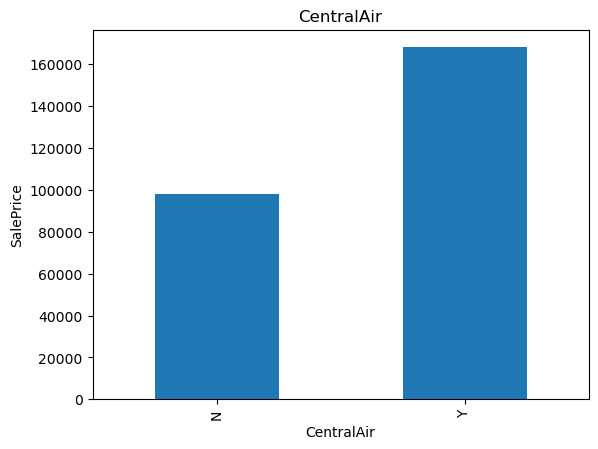

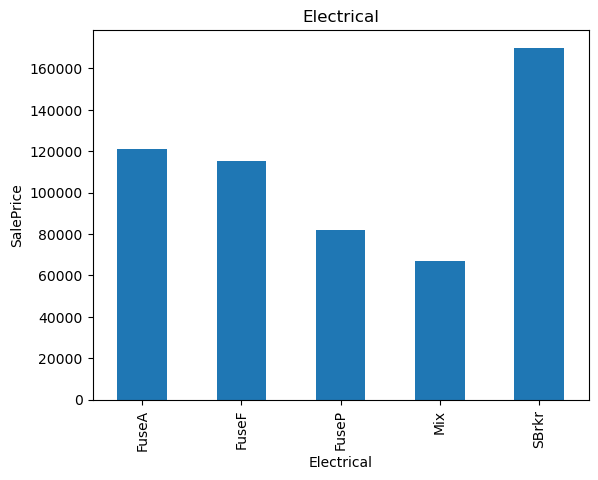

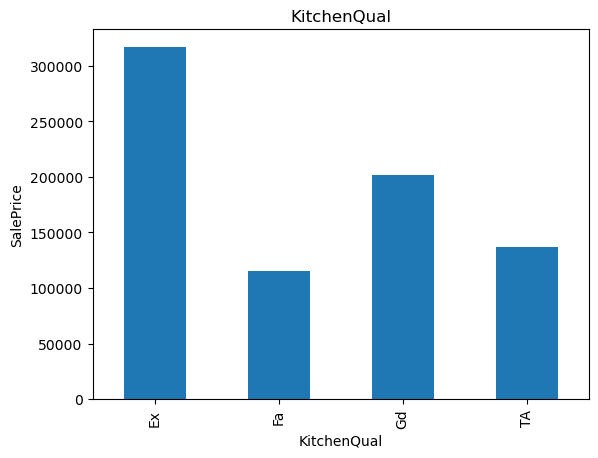

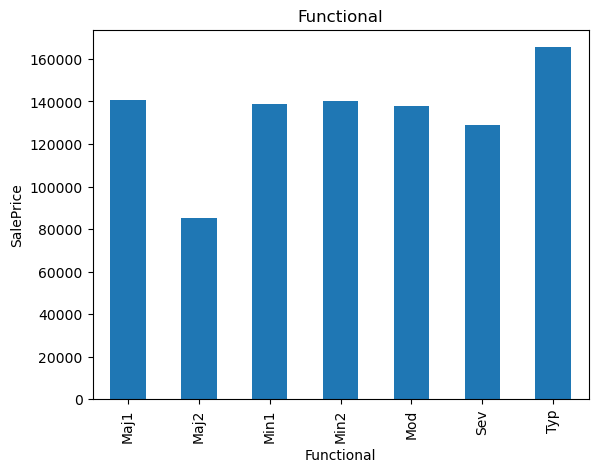

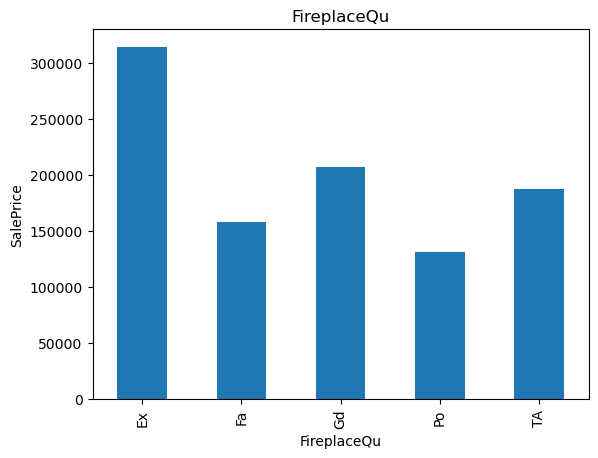

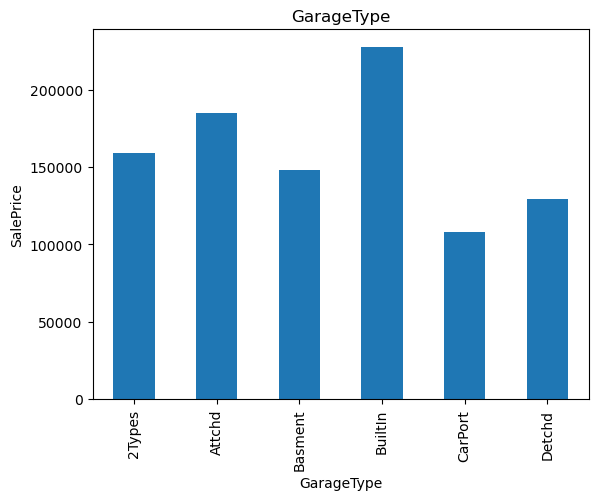

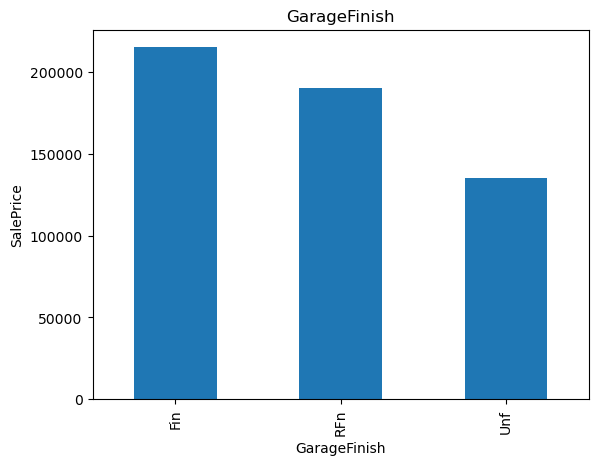

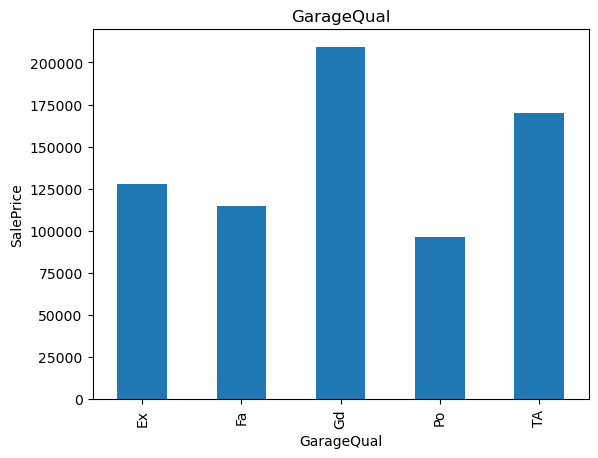

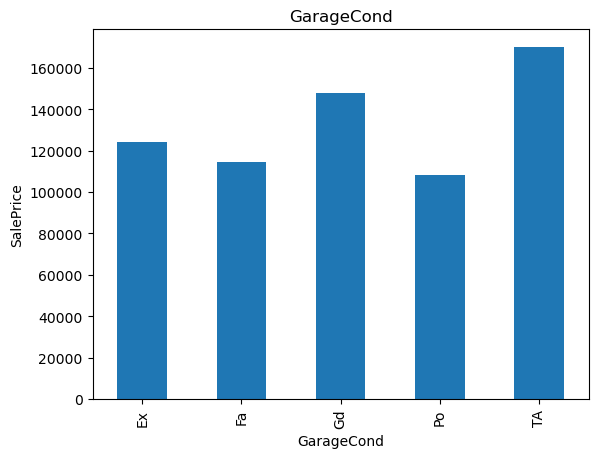

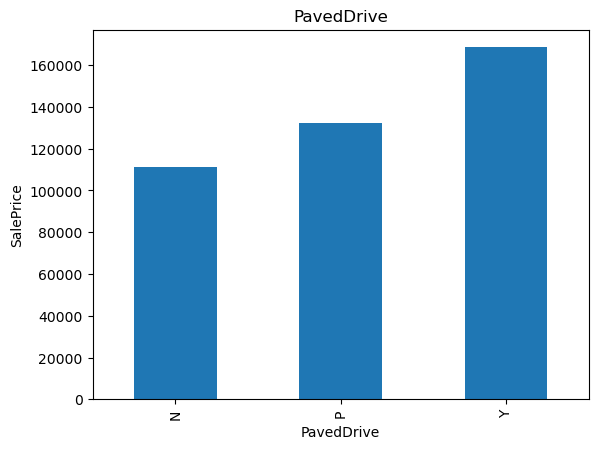

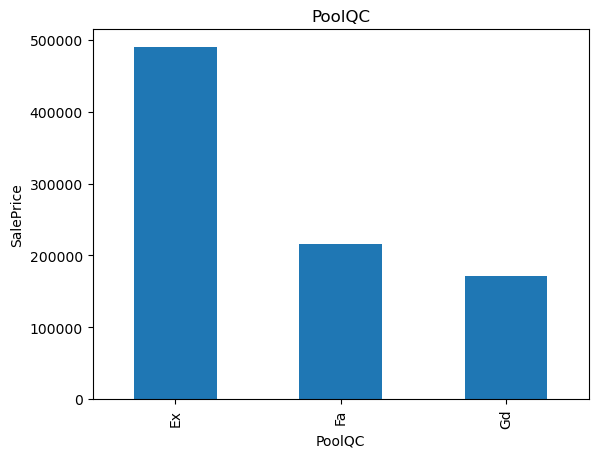

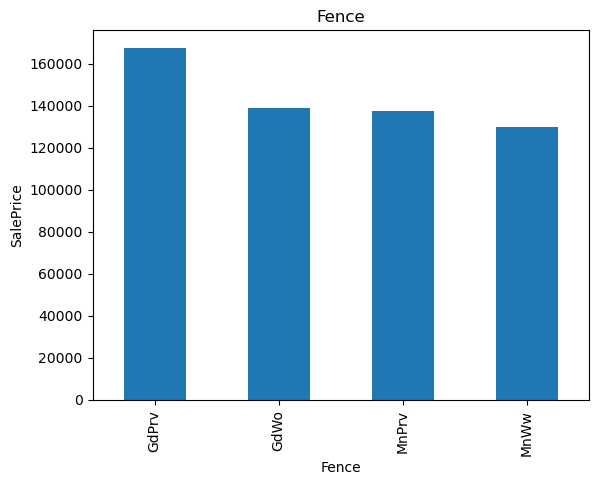

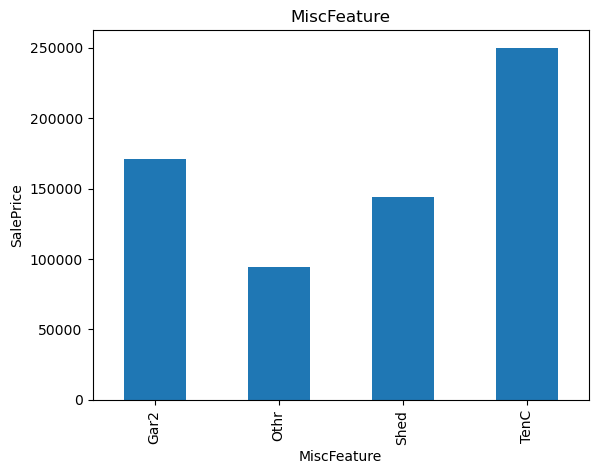

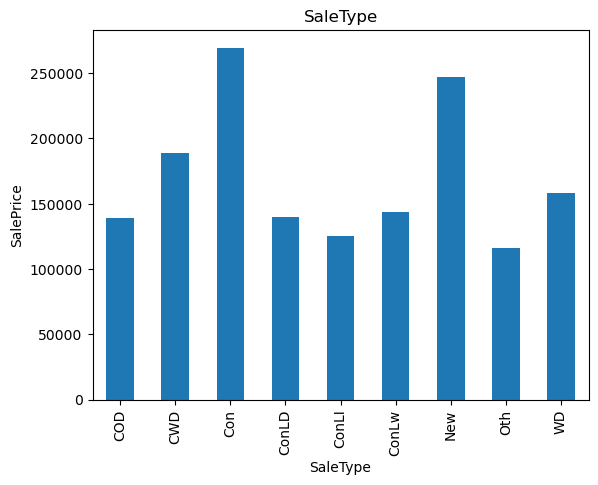

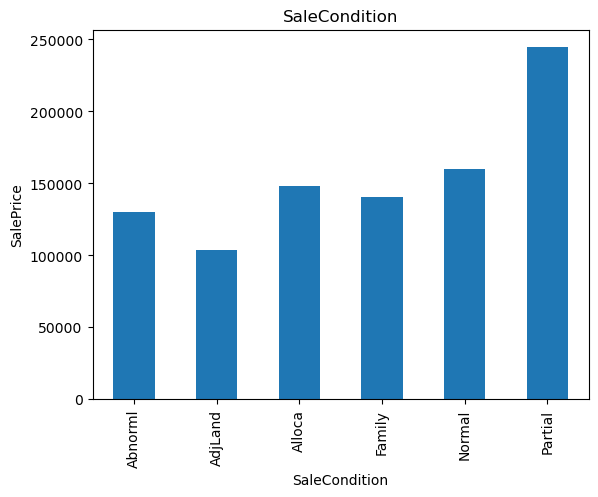

In [28]:
#Relationship between categorical features and dependent variable
for feature in feature_categorical:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

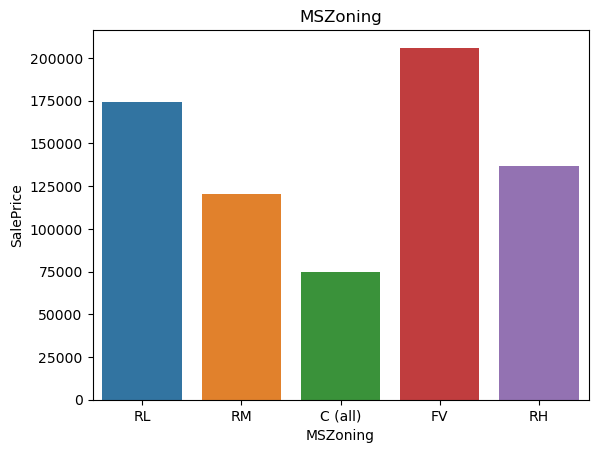

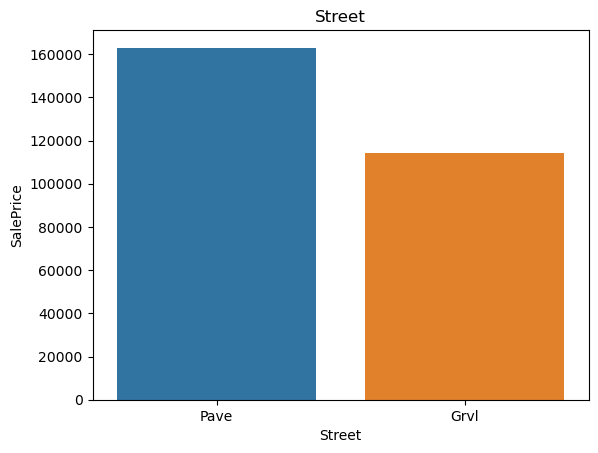

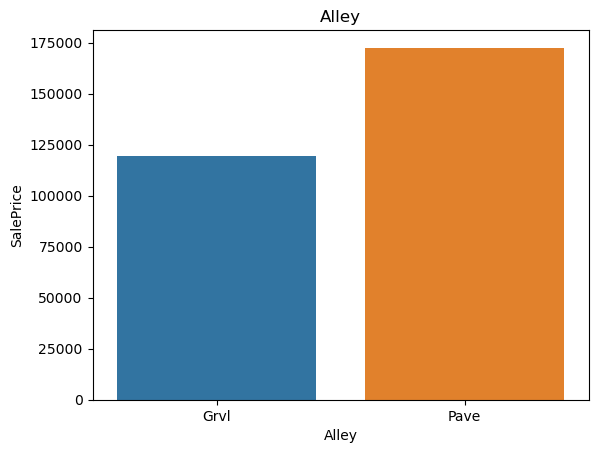

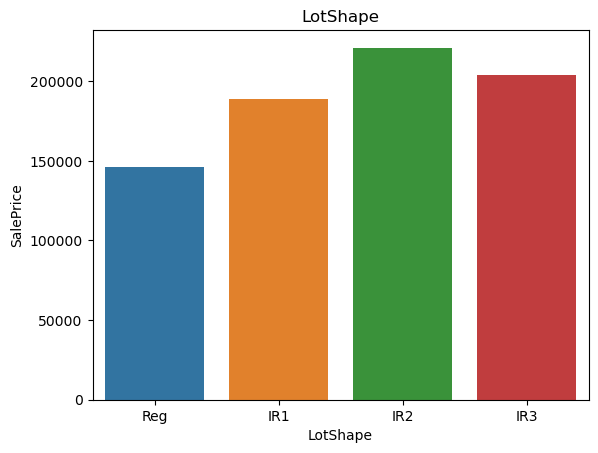

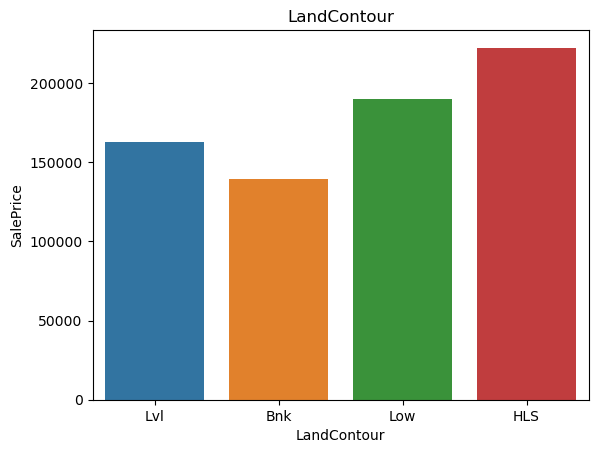

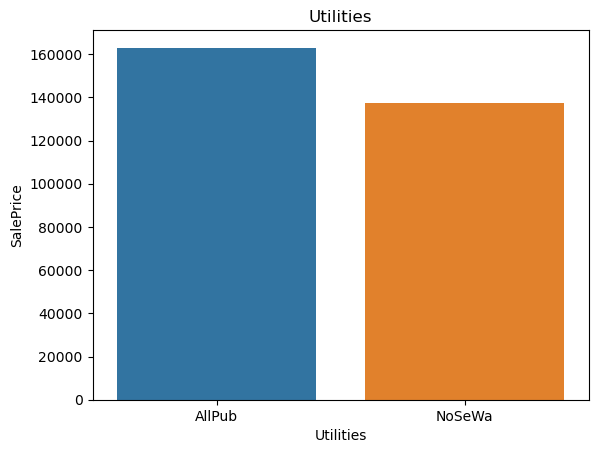

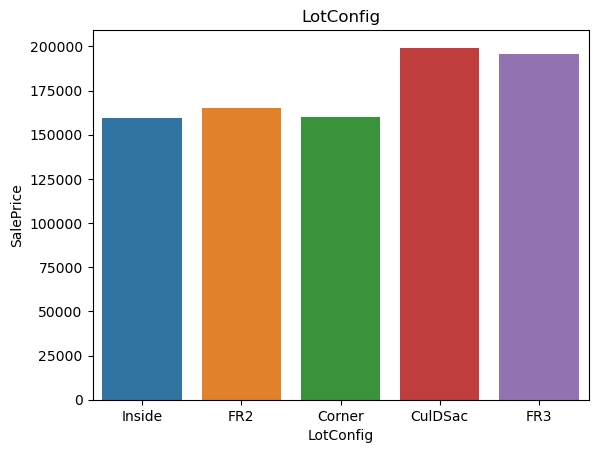

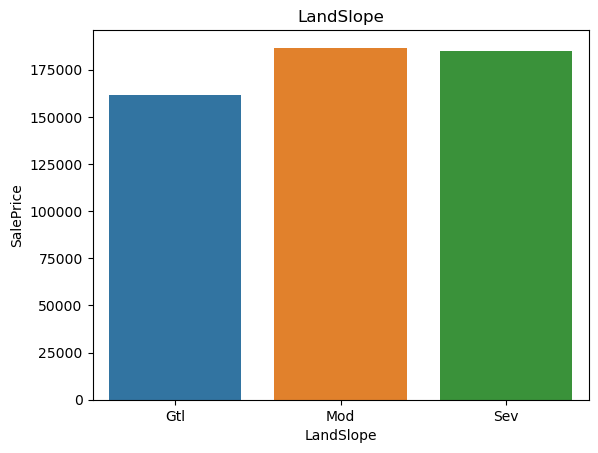

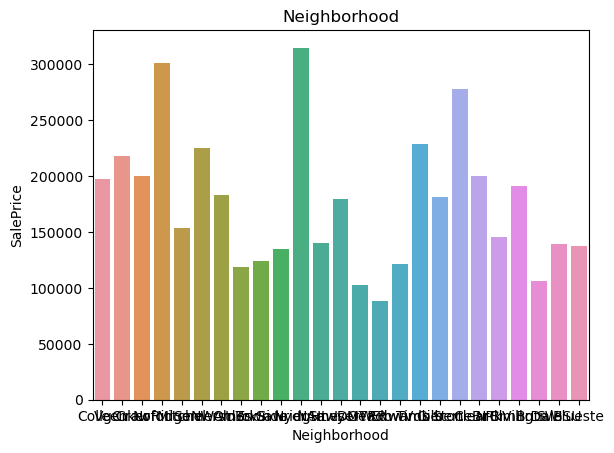

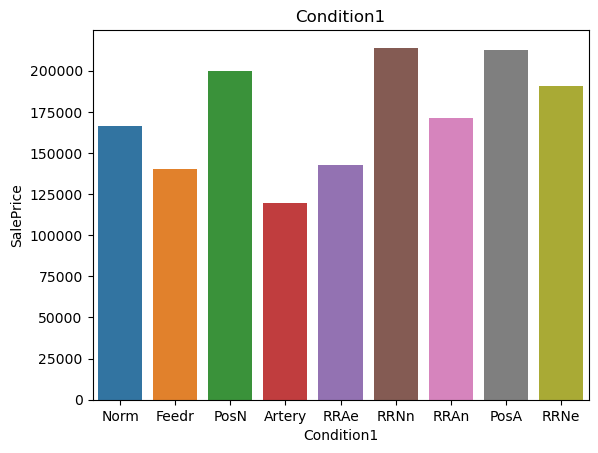

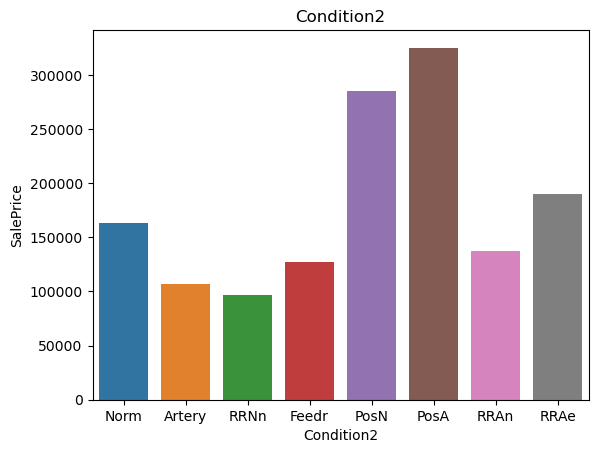

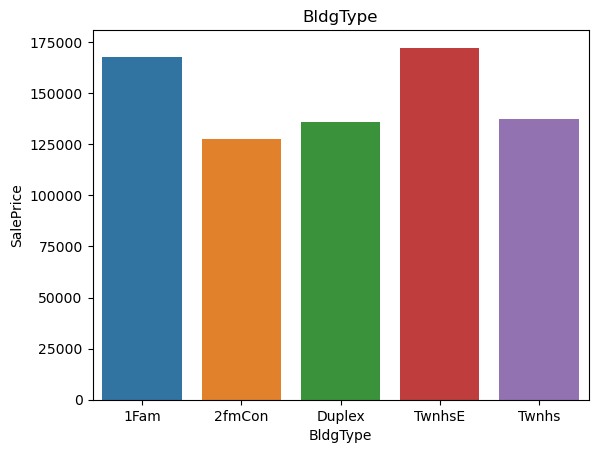

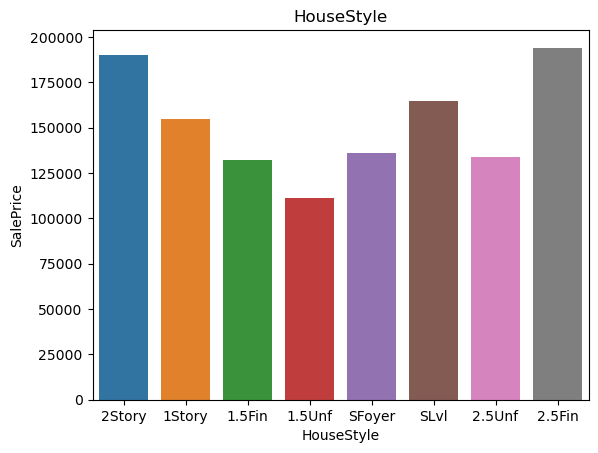

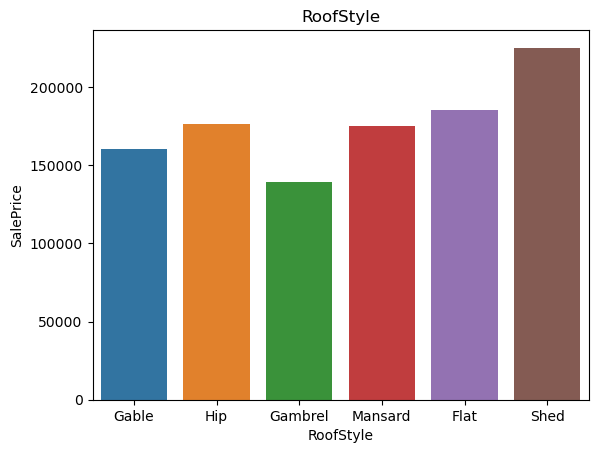

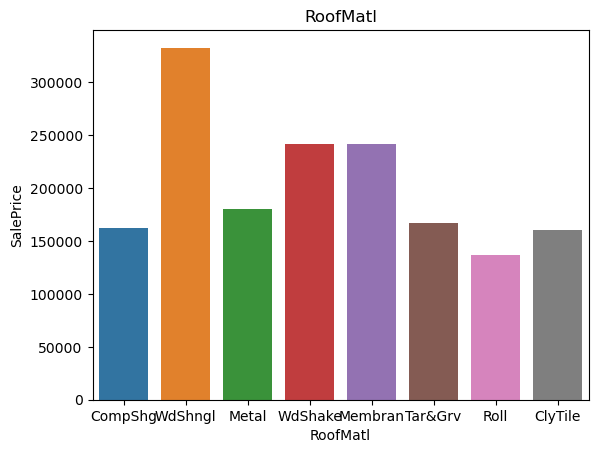

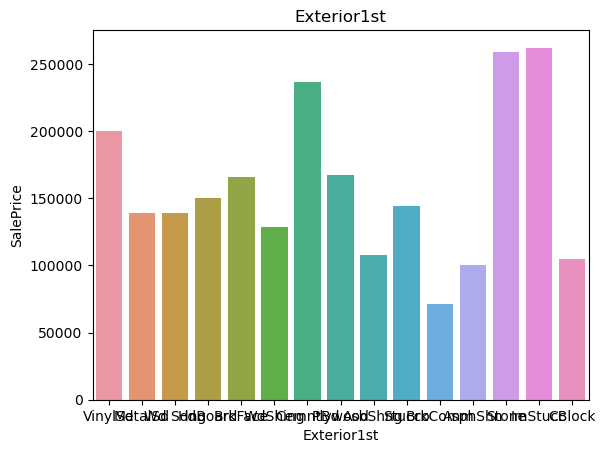

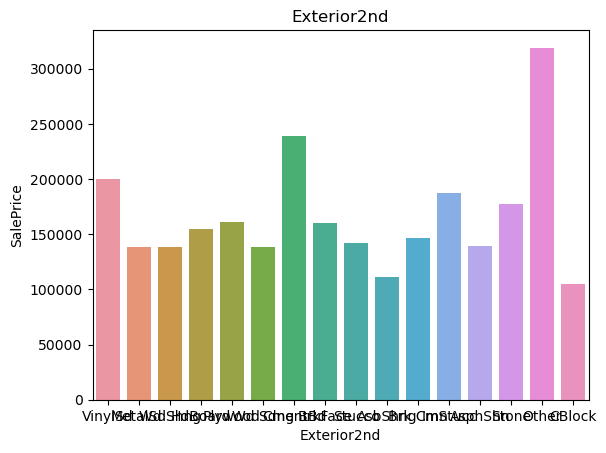

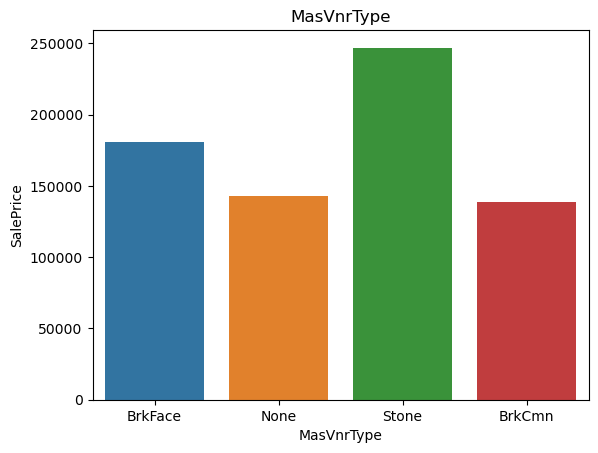

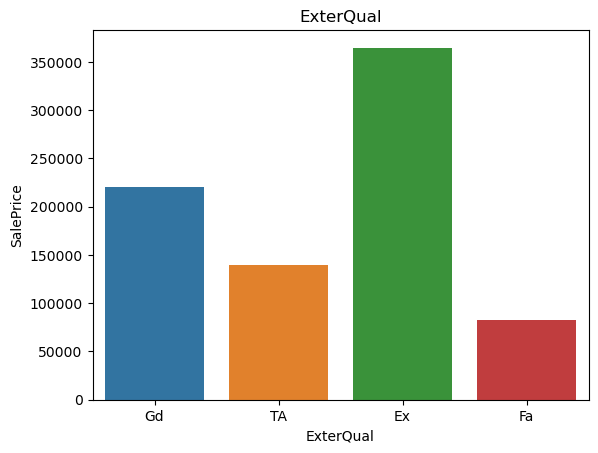

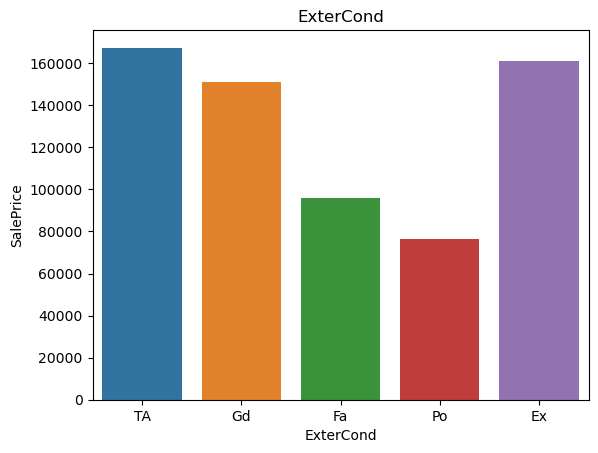

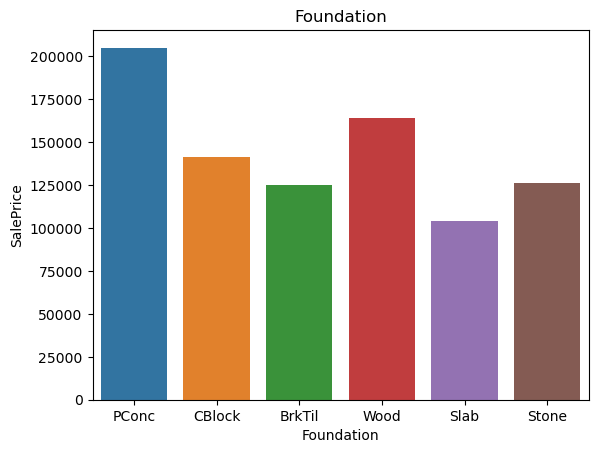

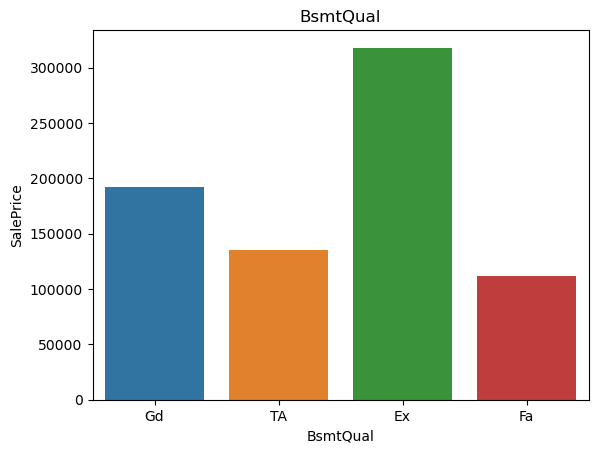

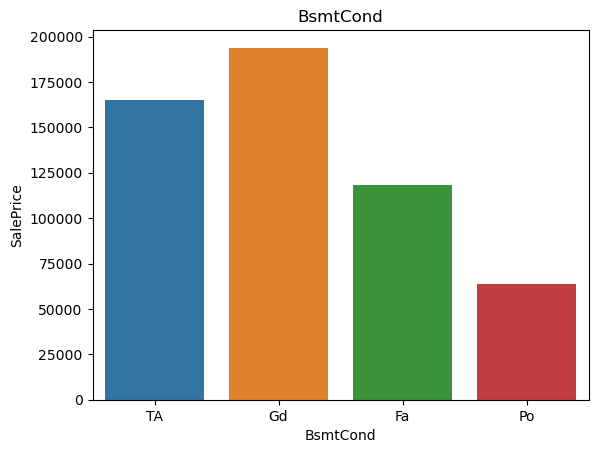

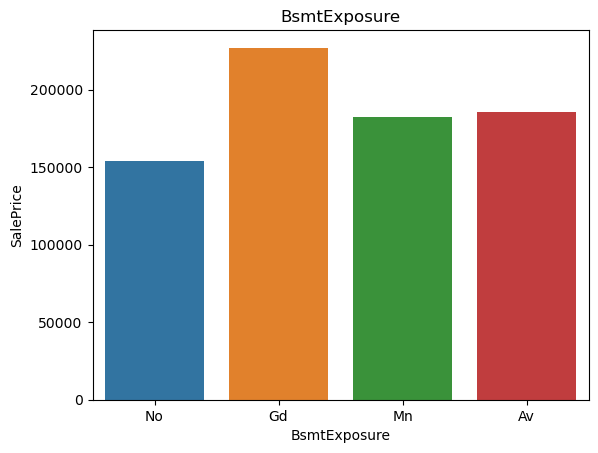

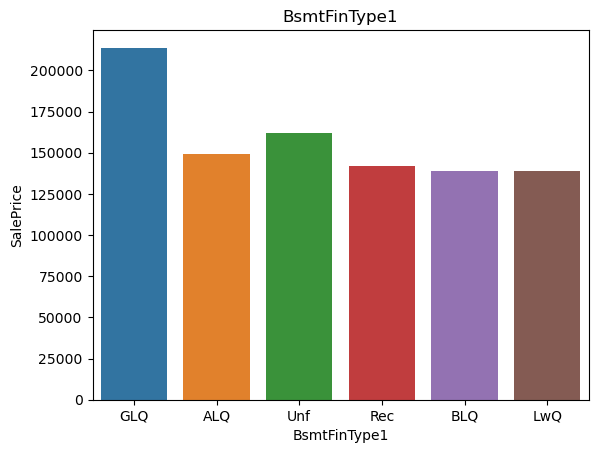

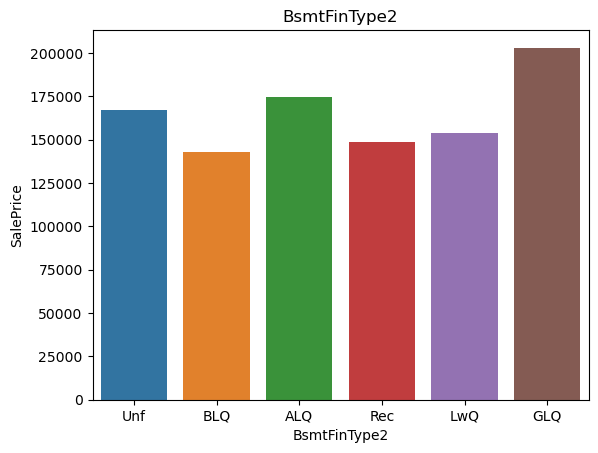

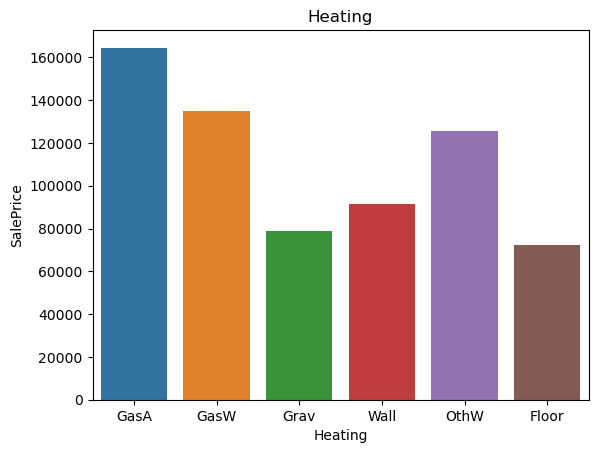

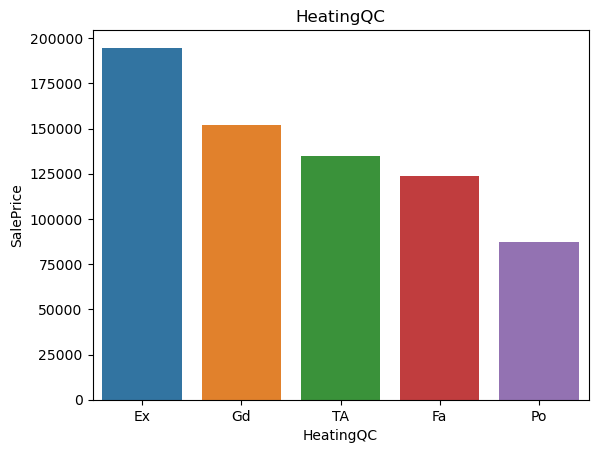

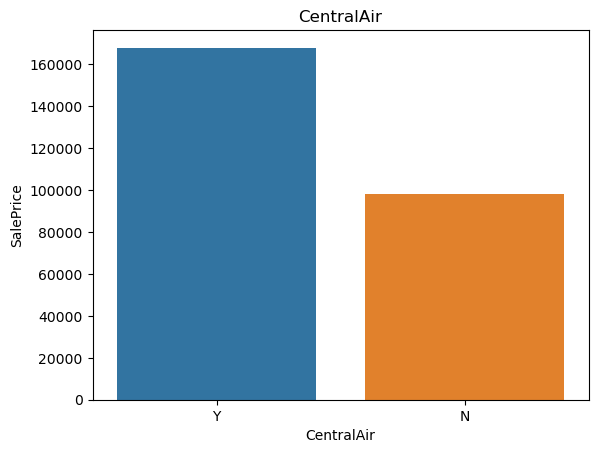

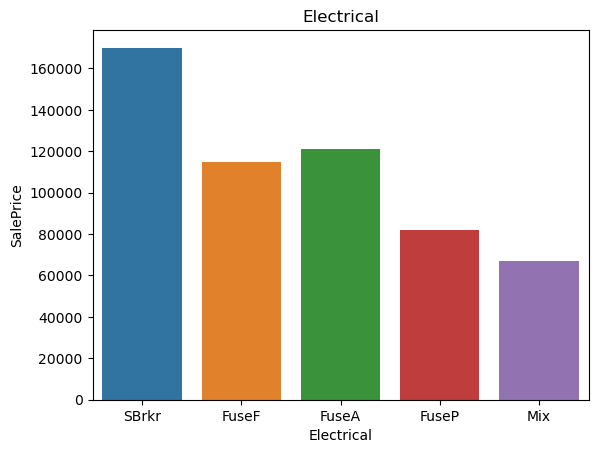

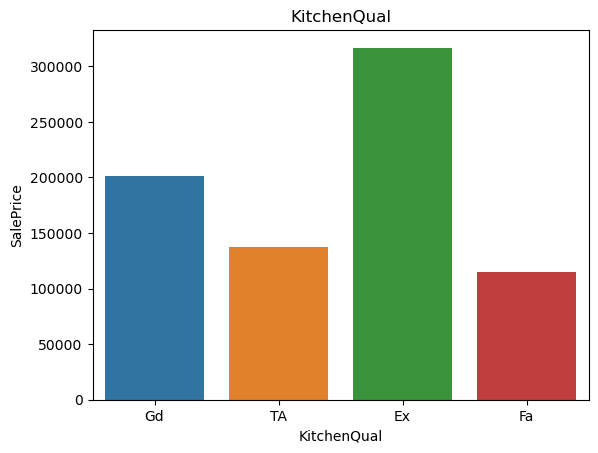

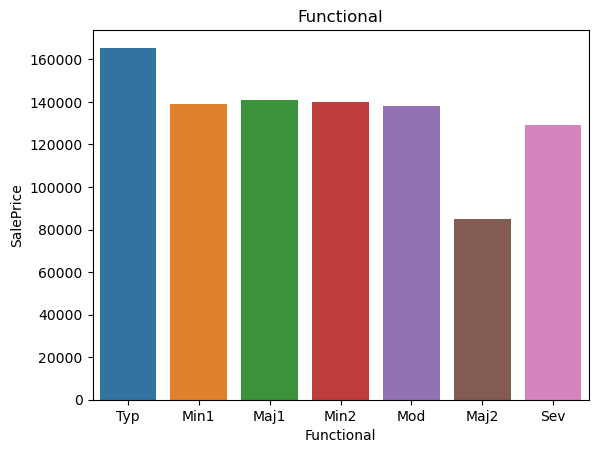

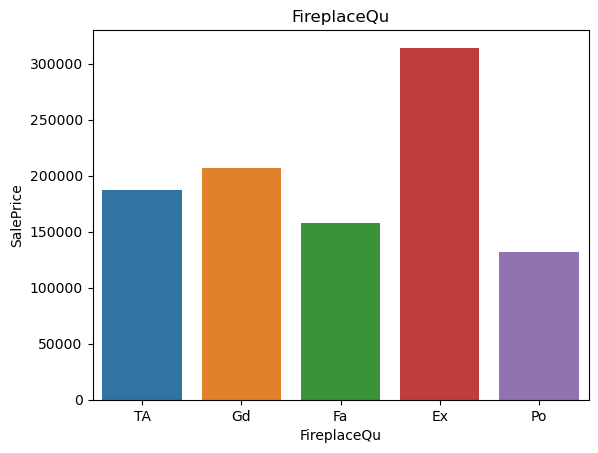

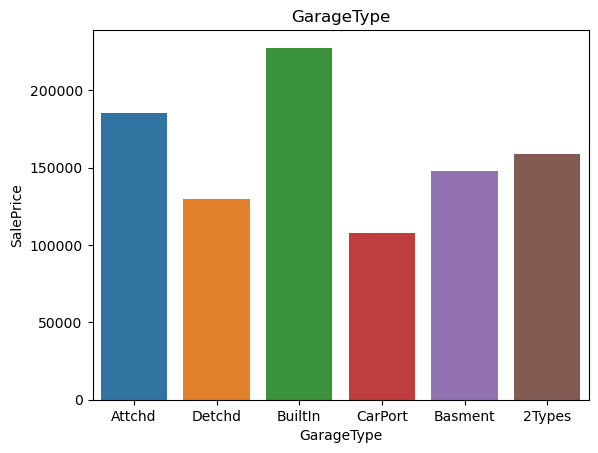

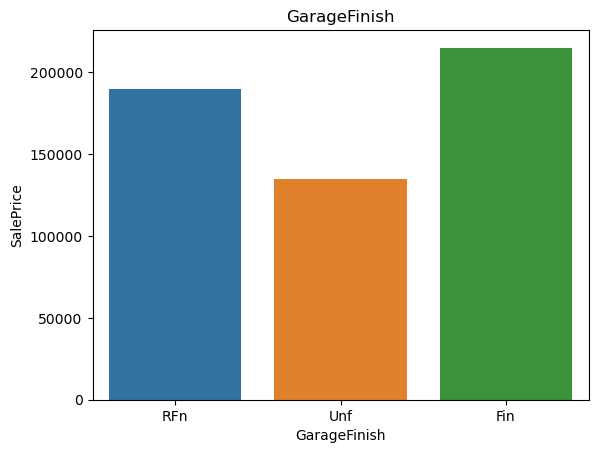

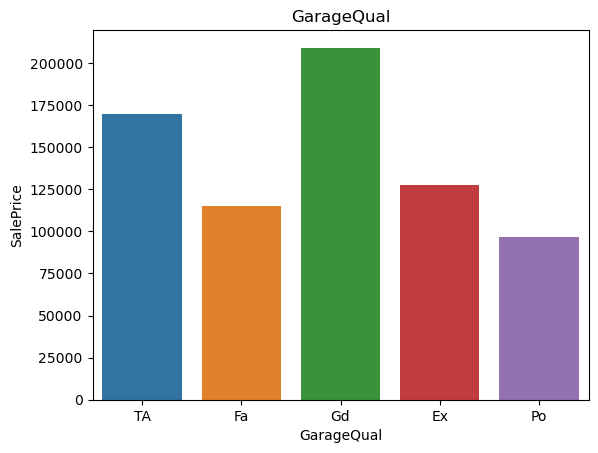

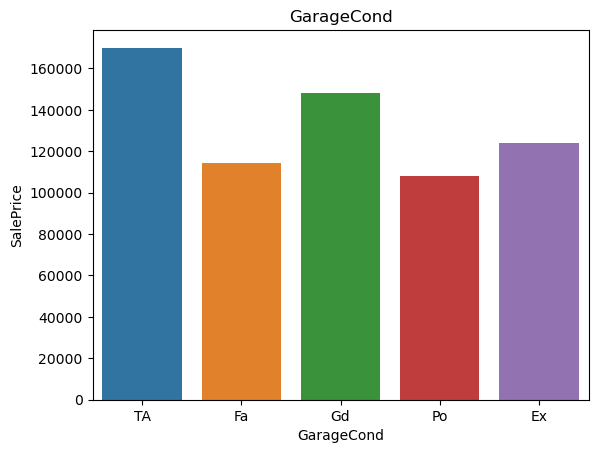

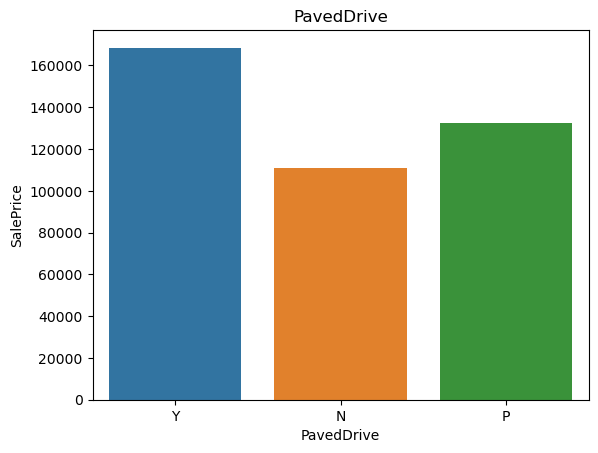

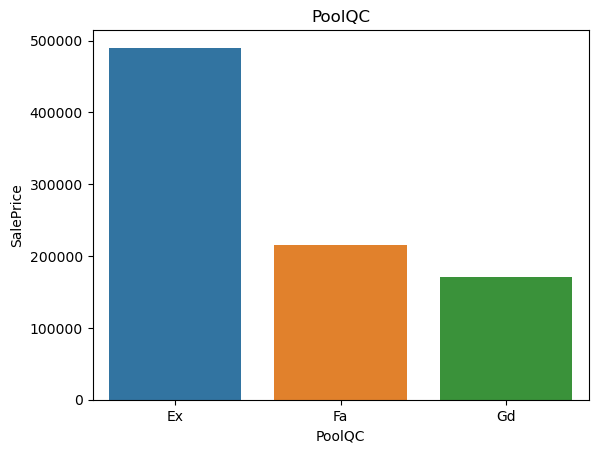

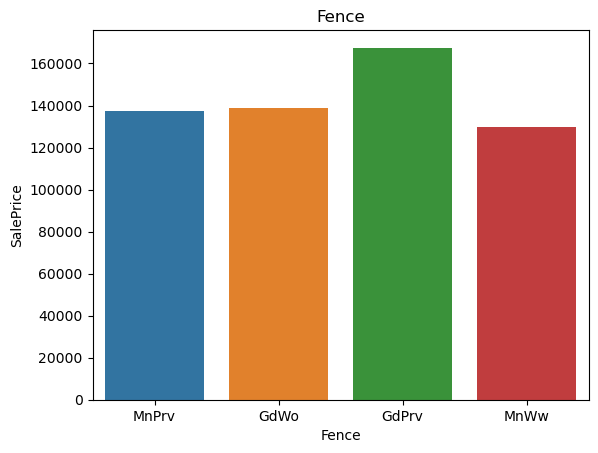

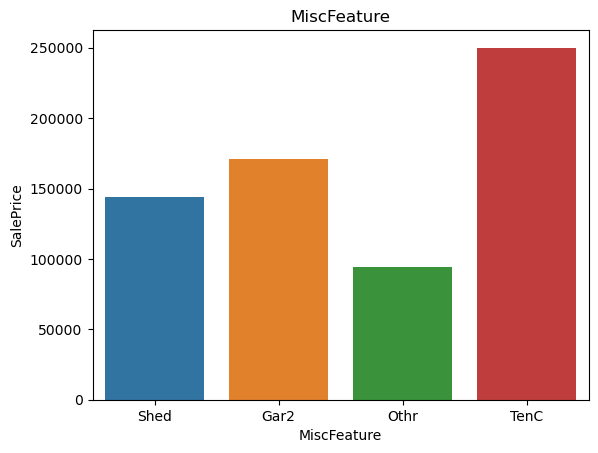

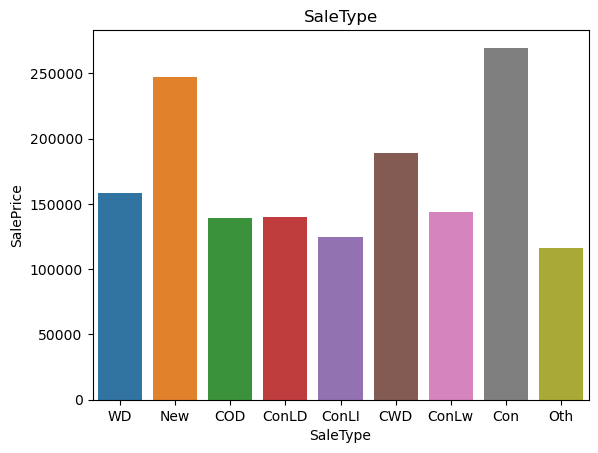

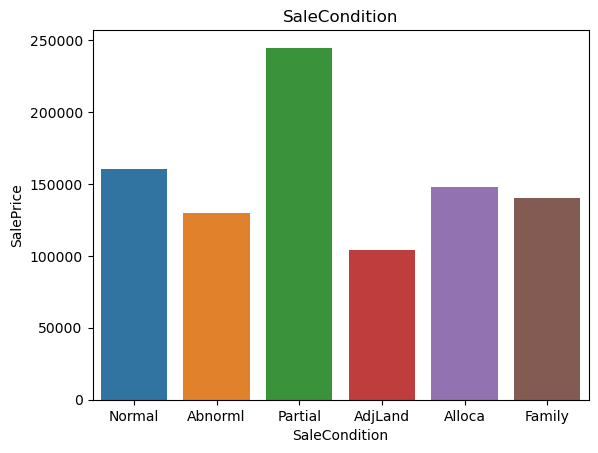

In [29]:
for feature in feature_categorical:
    dataset=data.copy()
    sns.barplot(x=feature, y='SalePrice', data=dataset, estimator=np.median, ci=None)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Feature Engineering
In feature engineering, we would perform or treating the following steps:
1. Missing values
2. Temporal varibale
3. Categorical variables: remove rare label
4. Standardise the values of the variables to the same range.

While doing feature engineering, first we do the train test split.
*In this Kaggle problem, we have a train data and a test data. In Kaggle problems since we want to get very good accuracy, we tend to combine the train and the test data. After combining the train and the test data, then we do feature engineering. Because of that there is a kind of data leakage. Some information of training data is passed to test data and some information of test data is passed to training data. As a result, the accuracy somewhat becomes better.*

But while implementing real life IT project, then we have to do a train test split. Go and apply feature engineering for the train data. Then apply the same feature engineering to the test data also. This would reduce the data leakage. It may also reduce the overfitting part.

***Perform feature engneering on test data as well after performing it for the train data***

##### Missing values

**1. Missing values of categorical features**

In [30]:
feature_nan=[feature for feature in data.columns if data[feature].isna().sum()>0 and data[feature].dtypes=='O']


In [31]:
for feature in feature_nan:
    print("{} : % of missing values {}".format(feature, np.round(data[feature].isna().mean(),4)))

Alley : % of missing values 0.9377
MasVnrType : % of missing values 0.0055
BsmtQual : % of missing values 0.0253
BsmtCond : % of missing values 0.0253
BsmtExposure : % of missing values 0.026
BsmtFinType1 : % of missing values 0.0253
BsmtFinType2 : % of missing values 0.026
Electrical : % of missing values 0.0007
FireplaceQu : % of missing values 0.4726
GarageType : % of missing values 0.0555
GarageFinish : % of missing values 0.0555
GarageQual : % of missing values 0.0555
GarageCond : % of missing values 0.0555
PoolQC : % of missing values 0.9952
Fence : % of missing values 0.8075
MiscFeature : % of missing values 0.963


**Replace the missing values with a new label 'Missing'. Those nan values are being converted to a new category. Later on we would see how this new categorical value gets converted to some integer value through One-hot encoding etc.**

***Whenever there is missing value in categorical feature, mae sure to create a new label like the 'Missing' label below so that it acts as a new category itself.***

In [32]:
def replace_cat_feature(data, features_nan):
    dataset=data.copy()
    dataset[features_nan]=dataset[features_nan].fillna('Missing')
    return dataset


data=replace_cat_feature(data, feature_nan)
data[feature_nan].isna().sum()


Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

#### 2. Missing values for numerical features

In [34]:
numerical_nan=[feature for feature in data.columns if data[feature].isna().sum()>1 and data[feature].dtypes!='O']
for feature in numerical_nan:
    print('{} : % missing values {}, datatype {}'.format(feature,np.round(data[feature].isna().mean(),4), data[feature].dtypes))

LotFrontage : % missing values 0.1774, datatype float64
MasVnrArea : % missing values 0.0055, datatype float64
GarageYrBlt : % missing values 0.0555, datatype float64


**Replacing the nan values of numerical column. In exploratory data analysis, we saw that the data has lot of outliers. esp in LotFrontage, so we would replace the nan values with median or mode**

In [35]:
for feature in numerical_nan:
    median_value=data[feature].median()
    
    #Before replacing the nan values, create a feature to capture the nan values. It gives more information about the feature which can be represented for the feature.
    data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    # Now fill the nan value with median because it has outliers
    data[feature]=data[feature].fillna(median_value)
    
data[numerical_nan].isna().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [36]:
data.head(50)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0    1          60       RL         65.0     8450   Pave  Missing      Reg   
1    2          20       RL         80.0     9600   Pave  Missing      Reg   
2    3          60       RL         68.0    11250   Pave  Missing      IR1   
3    4          70       RL         60.0     9550   Pave  Missing      IR1   
4    5          60       RL         84.0    14260   Pave  Missing      IR1   
5    6          50       RL         85.0    14115   Pave  Missing      IR1   
6    7          20       RL         75.0    10084   Pave  Missing      Reg   
7    8          60       RL         69.0    10382   Pave  Missing      IR1   
8    9          50       RM         51.0     6120   Pave  Missing      Reg   
9   10         190       RL         50.0     7420   Pave  Missing      Reg   
10  11          20       RL         70.0    11200   Pave  Missing      Reg   
11  12          60       RL         85.0    11924   Pave  Missing      IR1   
12  13          20       RL         69.0    12968   Pave  Missing      IR2   
13  14          20       RL         91.0    10652   Pave  Missing      IR1   
14  15          20       RL         69.0    10920   Pave  Missing      IR1   
15  16          45       RM         51.0     6120   Pave  Missing      Reg   
16  17          20       RL         69.0    11241   Pave  Missing      IR1   
17  18          90       RL         72.0    10791   Pave  Missing      Reg   
18  19          20       RL         66.0    13695   Pave  Missing      Reg   
19  20          20       RL         70.0     7560   Pave  Missing      Reg   
20  21          60       RL        101.0    14215   Pave  Missing      IR1   
21  22          45       RM         57.0     7449   Pave     Grvl      Reg   
22  23          20       RL         75.0     9742   Pave  Missing      Reg   
23  24         120       RM         44.0     4224   Pave  Missing      Reg   
24  25          20       RL         69.0     8246   Pave  Missing      IR1   
25  26          20       RL        110.0    14230   Pave  Missing      Reg   
26  27          20       RL         60.0     7200   Pave  Missing      Reg   
27  28          20       RL         98.0    11478   Pave  Missing      Reg   
28  29          20       RL         47.0    16321   Pave  Missing      IR1   
29  30          30       RM         60.0     6324   Pave  Missing      IR1   
30  31          70  C (all)         50.0     8500   Pave     Pave      Reg   
31  32          20       RL         69.0     8544   Pave  Missing      IR1   
32  33          20       RL         85.0    11049   Pave  Missing      Reg   
33  34          20       RL         70.0    10552   Pave  Missing      IR1   
34  35         120       RL         60.0     7313   Pave  Missing      Reg   
35  36          60       RL        108.0    13418   Pave  Missing      Reg   
36  37          20       RL        112.0    10859   Pave  Missing      Reg   
37  38          20       RL         74.0     8532   Pave  Missing      Reg   
38  39          20       RL         68.0     7922   Pave  Missing      Reg   
39  40          90       RL         65.0     6040   Pave  Missing      Reg   
40  41          20       RL         84.0     8658   Pave  Missing      Reg   
41  42          20       RL        115.0    16905   Pave  Missing      Reg   
42  43          85       RL         69.0     9180   Pave  Missing      IR1   
43  44          20       RL         69.0     9200   Pave  Missing      IR1   
44  45          20       RL         70.0     7945   Pave  Missing      Reg   
45  46         120       RL         61.0     7658   Pave  Missing      Reg   
46  47          50       RL         48.0    12822   Pave  Missing      IR1   
47  48          20       FV         84.0    11096   Pave  Missing      Reg   
48  49         190       RM         33.0     4456   Pave  Missing      Reg   
49  50          20       RL         66.0     7742   Pave  Missing      Reg   

   LandContour Utilities 

##### Temporal features

The temporal features are the date time features. For the date time features, we tried to find the relationship of Year built, year remodified etc with year sold so that we can find the reason of decreasing house prices. In feature engineering, we would try to convert to how many years for year built, year modified by the time it was sold.

In [37]:
for feature in feature_year:
    if feature!='YrSold':
         data[feature]=data['YrSold']-data[feature]
   

In [38]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Missing      Reg   
1   2          20       RL         80.0     9600   Pave  Missing      Reg   
2   3          60       RL         68.0    11250   Pave  Missing      IR1   
3   4          70       RL         60.0     9550   Pave  Missing      IR1   
4   5          60       RL         84.0    14260   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1      

In [39]:
data[feature_year].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0          5             5          5.0    2008
1         31            31         31.0    2007
2          7             6          7.0    2008
3         91            36          8.0    2006
4          8             8          8.0    2008

##### The numerical features were skewed, we would be performing log-normal transformation. We already performed log normal transformation and saw the trends through visualisation. Now we change the data in the original data itself.

In [40]:
skewed_values=[]
for feature in feature_continuous:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        skewed_values.append(feature)
print(skewed_values)


['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']


In [41]:
for feature in skewed_values:
    data[feature]=np.log(data[feature])

In [42]:
data.head()

Id  MSSubClass MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0   1          60       RL     4.174387  9.041922   Pave  Missing      Reg   
1   2          20       RL     4.382027  9.169518   Pave  Missing      Reg   
2   3          60       RL     4.219508  9.328123   Pave  Missing      IR1   
3   4          70       RL     4.094345  9.164296   Pave  Missing      IR1   
4   5          60       RL     4.430817  9.565214   Pave  Missing      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5          5   
1       Norm     1Fam     1Story            6            8         31   
2       Norm     1Fam     2Story            7            5          7   
3       Norm     1Fam     2Story            7            5         91   
4       Norm     1Fam     2Story            8            5          8   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0             5     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1            31     Gable  CompShg     MetalSd     MetalSd       None   
2             6     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3            36     Gable  CompShg     Wd Sdng     Wd Shng       None   
4             8     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr  6.752270       854             0   
1    GasA        Ex          Y      SBrkr  7.140453         0             0   
2    GasA        Ex          Y      SBrkr  6.824374       866             0   
3    GasA        Gd          Y      SBrkr  6.867974       756             0   
4    GasA        Ex          Y      SBrkr  7.043160      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0   7.444249             1             0         2         1             3   
1   7.140453             0             1         2         0             3   
2   7.487734             1             0         2         1             3   
3   7.448334             1             0         1         0             3   
4   7.695303             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0     Missing   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1

#### Handling rare categorical feature

Categorical variables which are less than 1% of the total observations, we would convert them to a new label. If the percentage of a category inside the categorical feature is less than 0.01, then we would convert it to a new label.

In [43]:
for feature in feature_categorical:
    #Group by the categories that are present inside the categorical feature
    temp=data.groupby(feature)['SalePrice'].count()/len(data)
    #print(temp)
    #If the temporary percentage is greater than 10% (0.01), then we would take the index considering 
    temp_df=temp[temp>0.01].index
    #print(temp_df)
    #Now if the data[feature] is in temp_df, then we would take data[feature]. If not, then it means it is less than 0.01% we would convert it to a new label called as Rare_var
    data[feature]=np.where(data[feature].isin(temp_df), data[feature], 'Rare_var')

In [44]:
data.head(50)

Id  MSSubClass  MSZoning  LotFrontage   LotArea Street    Alley LotShape  \
0    1          60        RL     4.174387  9.041922   Pave  Missing      Reg   
1    2          20        RL     4.382027  9.169518   Pave  Missing      Reg   
2    3          60        RL     4.219508  9.328123   Pave  Missing      IR1   
3    4          70        RL     4.094345  9.164296   Pave  Missing      IR1   
4    5          60        RL     4.430817  9.565214   Pave  Missing      IR1   
5    6          50        RL     4.442651  9.554993   Pave  Missing      IR1   
6    7          20        RL     4.317488  9.218705   Pave  Missing      Reg   
7    8          60        RL     4.234107  9.247829   Pave  Missing      IR1   
8    9          50        RM     3.931826  8.719317   Pave  Missing      Reg   
9   10         190        RL     3.912023  8.911934   Pave  Missing      Reg   
10  11          20        RL     4.248495  9.323669   Pave  Missing      Reg   
11  12          60        RL     4.442651  9.386308   Pave  Missing      IR1   
12  13          20        RL     4.234107  9.470240   Pave  Missing      IR2   
13  14          20        RL     4.510860  9.273503   Pave  Missing      IR1   
14  15          20        RL     4.234107  9.298351   Pave  Missing      IR1   
15  16          45        RM     3.931826  8.719317   Pave  Missing      Reg   
16  17          20        RL     4.234107  9.327323   Pave  Missing      IR1   
17  18          90        RL     4.276666  9.286468   Pave  Missing      Reg   
18  19          20        RL     4.189655  9.524786   Pave  Missing      Reg   
19  20          20        RL     4.248495  8.930626   Pave  Missing      Reg   
20  21          60        RL     4.615121  9.562053   Pave  Missing      IR1   
21  22          45        RM     4.043051  8.915835   Pave     Grvl      Reg   
22  23          20        RL     4.317488  9.184202   Pave  Missing      Reg   
23  24         120        RM     3.784190  8.348538   Pave  Missing      Reg   
24  25          20        RL     4.234107  9.017484   Pave  Missing      IR1   
25  26          20        RL     4.700480  9.563108   Pave  Missing      Reg   
26  27          20        RL     4.094345  8.881836   Pave  Missing      Reg   
27  28          20        RL     4.584967  9.348187   Pave  Missing      Reg   
28  29          20        RL     3.850148  9.700208   Pave  Missing      IR1   
29  30          30        RM     4.094345  8.752107   Pave  Missing      IR1   
30  31          70  Rare_var     3.912023  9.047821   Pave     Pave      Reg   
31  32          20        RL     4.234107  9.052985   Pave  Missing      IR1   
32  33          20        RL     4.442651  9.310095   Pave  Missing      Reg   
33  34          20        RL     4.248495  9.264071   Pave  Missing      IR1   
34  35         120        RL     4.094345  8.897409   Pave  Missing      Reg   
35  36          60        RL     4.682131  9.504352   Pave  Missing      Reg   
36  37          20        RL     4.718499  9.292750   Pave  Missing      Reg   
37  38          20        RL     4.304065  9.051579   Pave  Missing      Reg   
38  39          20        RL     4.219508  8.977399   Pave  Missing      Reg   
39  40          90        RL     4.174387  8.706159   Pave  Missing      Reg   
40  41          20        RL     4.430817  9.066239   Pave  Missing      Reg   
41  42          20        RL     4.744932  9.735365   Pave  Missing      Reg   
42  43          85        RL     4.234107  9.124782   Pave  Missing      IR1   
43  44          20        RL     4.234107  9.126959   Pave  Missing      IR1   
44  45          20        RL     4.248495  8.980298   Pave  Missing      Reg   
45  46         120        RL     4.110874  8.943506   Pave  Missing      Reg   
46  47          50        RL     3.871201  9.458918   Pave  Missing      IR1   
47  48          20        FV     4.430817  9.314340   Pave  Missing      Reg   
48  49         190        RM     3.496508  8.402007   Pave  Missing      Reg   
49  

### Encoding the categorical features

In [45]:
for feature in feature_categorical:
    labels_ordered=data.groupby(feature)['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

#from sklearn.preprocessing import LabelEncoder
#label_encoder=LabelEncoder()
#for feature in feature_categorical:
    #data[feature]=label_encoder.fit_transform(data[feature])
    
#from sklearn.preprocessing import OneHotEncoder
#onehot_encoder-OneHotEncoder()
#for feature in feature_categorical:
    #data[feature]=onehot_encoder.fit_transform(data.feature.values.reshape(-1,1)).toarray())

In [46]:
data.head(10)

Id  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  LotShape  \
0   1          60         3     4.174387  9.041922       1      2         0   
1   2          20         3     4.382027  9.169518       1      2         0   
2   3          60         3     4.219508  9.328123       1      2         1   
3   4          70         3     4.094345  9.164296       1      2         1   
4   5          60         3     4.430817  9.565214       1      2         1   
5   6          50         3     4.442651  9.554993       1      2         1   
6   7          20         3     4.317488  9.218705       1      2         0   
7   8          60         3     4.234107  9.247829       1      2         1   
8   9          50         1     3.931826  8.719317       1      2         0   
9  10         190         3     3.912023  8.911934       1      2         0   

   LandContour  Utilities  LotConfig  LandSlope  Neighborhood  Condition1  \
0            1          1          0          0            14           2   
1            1          1          2          0            11           1   
2            1          1          0          0            14           2   
3            1          1          1          0            16           2   
4            1          1          2          0            22           2   
5            1          1          0          0             9           2   
6            1          1          0          0            18           2   
7            1          1          1          0            12           5   
8            1          1          0          0             4           0   
9            1          1          1          0             3           0   

   Condition2  BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  \
0           1         3           5            7            5          5   
1           1         3           3            6            8         31   
2           1         3           5            7            5          7   
3           1         3           5            7            5         91   
4           1         3           5            8            5          8   
5           1         3           1            5            5         16   
6           1         3           3            8            5          3   
7           1         3           5            7            6         36   
8           1         3           1            7            5         77   
9           0         0           2            5            6         69   

   YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  \
0             5          0         0           10           10           2   
1            31          0         0            4            3           1   
2             6          0         0           10           10           2   
3            36          0         0            2            4           1   
4             8          0         0           10           10           2   
5            14          0         0           10           10           1   
6             2          0         0           10           10           4   
7            36          0         0            6            5           4   
8            58          0         0            8            4           1   
9            58          0         0            4            3           1   

   MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  \
0       196.0          2          3           4         3         3   
1         0.0          1          3           2         3         3   
2       162.0          2          3           4         3         3   
3         0.0          1          3           1         2         4   
4       350.0          2          3           4         3         3   
5         0.0          1          3           3         3         3   
6       186.0          2          3           4         4         3   
7       240.0        

#### Feature Scaling

We do feature scaling because we have many features which are measured in different units. So we do feature scaling so that we can apply the machine learning algorithms in a better way.

We have to select on which feature we want to perform scaling. We do not want to perform for *Id* column which we can drop later and also on *SalePrice* which is the dependent/target feature.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features_scaling=[feature for feature in data.columns if feature not in ['Id','SalePrice']]
scaler.fit(data[features_scaling])

MinMaxScaler()

In this problem we applied MinMaxScaler. We can also apply StandardScaler. Standard Scaler converts a data based on standard normal distribution. But MinMaxScaler converts data between 0 to 1. 

In [48]:
scaler.transform(data[features_scaling])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.75      , 0.47117546, ..., 0.        , 0.        ,
        0.        ]])

scaler.transform converts the data into an array form. We need to put it back in a data frame. Also concatenate the SalePrice and Id column.

In [49]:
data_final=pd.concat([data[['Id','SalePrice']].reset_index(drop=True),
                  pd.DataFrame(scaler.transform(data[features_scaling]), columns=features_scaling)], axis=1)

In [50]:
data_final.head()

Id  SalePrice  MSSubClass  MSZoning  LotFrontage   LotArea  Street  Alley  \
0   1  12.247694    0.235294      0.75     0.418208  0.366344     1.0    1.0   
1   2  12.109011    0.000000      0.75     0.495064  0.391317     1.0    1.0   
2   3  12.317167    0.235294      0.75     0.434909  0.422359     1.0    1.0   
3   4  11.849398    0.294118      0.75     0.388581  0.390295     1.0    1.0   
4   5  12.429216    0.235294      0.75     0.513123  0.468761     1.0    1.0   

   LotShape  LandContour  Utilities  LotConfig  LandSlope  Neighborhood  \
0  0.000000     0.333333        1.0       0.00        0.0      0.636364   
1  0.000000     0.333333        1.0       0.50        0.0      0.500000   
2  0.333333     0.333333        1.0       0.00        0.0      0.636364   
3  0.333333     0.333333        1.0       0.25        0.0      0.727273   
4  0.333333     0.333333        1.0       0.50        0.0      1.000000   

   Condition1  Condition2  BldgType  HouseStyle  OverallQual  OverallCond  \
0         0.4         1.0      0.75         1.0     0.666667        0.500   
1         0.2         1.0      0.75         0.6     0.555556        0.875   
2         0.4         1.0      0.75         1.0     0.666667        0.500   
3         0.4         1.0      0.75         1.0     0.666667        0.500   
4         0.4         1.0      0.75         1.0     0.777778        0.500   

   YearBuilt  YearRemodAdd  RoofStyle  RoofMatl  Exterior1st  Exterior2nd  \
0   0.036765      0.098361        0.0       0.0          1.0          1.0   
1   0.227941      0.524590        0.0       0.0          0.4          0.3   
2   0.051471      0.114754        0.0       0.0          1.0          1.0   
3   0.669118      0.606557        0.0       0.0          0.2          0.4   
4   0.058824      0.147541        0.0       0.0          1.0          1.0   

   MasVnrType  MasVnrArea  ExterQual  ExterCond  Foundation  BsmtQual  \
0        0.50     0.12250   0.666667        1.0        1.00      0.75   
1        0.25     0.00000   0.333333        1.0        0.50      0.75   
2        0.50     0.10125   0.666667        1.0        1.00      0.75   
3        0.25     0.00000   0.333333        1.0        0.25      0.50   
4        0.50     0.21875   0.666667        1.0        1.00      0.75   

   BsmtCond  BsmtExposure  BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  \
0      0.75          0.25      1.000000    0.125089      0.833333         0.0   
1      0.75          1.00      0.666667    0.173281      0.833333         0.0   
2      0.75          0.50      1.000000    0.086109      0.833333         0.0   
3      1.00          0.25      0.666667    0.038271      0.833333         0.0   
4      0.75          0.75      1.000000    0.116052      0.833333         0.0   

   BsmtUnfSF  TotalBsmtSF  Heating  HeatingQC  CentralAir  Electrical  \
0   0.064212     0.140098      1.0       1.00         1.0         1.0   
1   0.121575     0.206547      1.0       1.00         1.0         1.0   
2   0.185788     0.150573      1.0       1.00         1.0         1.0   
3   0.231164     0.123732      1.0       0.75         1.0         1.0   
4   0.209760     0.187398      1.0       1.00         1.0         1.0   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0  0.356155  0.413559           0.0   0.577712      0.333333           0.0   
1  0.503056  0.000000           0.0   0.470245      0.000000           0.5   
2  0.383441  0.419370           0.0   0.593095      0.333333           0.0   
3  0.399941  0.366102           0.0   0.579157      0.333333           0.0   
4  0.466237  0.509927           0.0   0.666523      0.333333           0.0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0  0.666667       0.5         0.375      0.333333     0.666667      0.500000   
1  0.666667       0.0         0.375      0.333333     0.333333      0.333333   
2  0.666667       0.5         0.375      0.333333     0.666667      0.3

Now the data is ready to be put up in the ML algorithm.

### The same feature engineering is to be done for the test data.

Perfrom this last step so that you do not have to do preprocessing again and again

In [51]:
data_final.to_csv('E://DS Projects//House Price Advanced Regression//X_train_processed.csv', index=False)